# <h1><center>Rain in Australia</center></h1>


<center>
<img src="https://drive.google.com/thumbnail?id=1jeVAK1A6OcNi-bz8ha4_NFbWVXGMJ7Zw&sz=w3000" width="500" alt="Figura 1: Datos meterológicos de Australia del 2008 al 2009, obtenidos de http://www.bom.gov.au/climate/history/enso/">

<small><em>Figura 1: Datos meterológicos de Australia del 2008 al 2009, obtenidos de http://www.bom.gov.au/climate/history/enso/</em></small>
</center>

<center>
<em>Datos del proyecto:</em>

| Subtitulo   | Trabajo final de Aprendizaje de MAquina I - FIUBA                                                                                                     |
| ----------- | ---------------------------------------------------------------------------------------------------------------------------------------------- |
| **Descrpción**  | Análisis de datos meteorológicos de Australia con el objetivo de predecir si lloverá al otro día                          |
| **Integrantes** | • Juan Cruz Ferreyra (ferreyra.juancruz95@gmail.com)<br>• Simón Rodriguez (simon.andre.r@gmail.com)<br>• Bruno Masoller (brunomaso1@gmail.com)<br>• David Canal (jose.david.canal.89@gmail.com) |

</center>

## 1. Metodología

En el campo de aprendizaje de máquina, la comunidad todavía está definiendo un proceso sistemático y estructurado para el cliclo de vida de soluciones basadas en aprendizaje automático. El objetivo es enfocar los procedimientos y estándares de calidad de la ingeniería de software clásica a metodologías de este sub-campo de la inteligencia artificial.

Es en este punto que surge [CRISP-ML(Q)](https://arxiv.org/pdf/2003.05155.pdf), como una metodología que integra las mejores prácticas de la ingeniería de software sobre todo el ciclo de vida de soluciones enfocadas en resolver problemas con aprendizaje de máquina.

CRISP-ML(Q) surge a partir de [CRISP-DM](https://es.wikipedia.org/wiki/Cross_Industry_Standard_Process_for_Data_Mining) como un intento de ampliar dicho "framework" al área de "machine learning".

En palabras de los autores (Stefan Studer et al),  CRISP-ML(Q) propone un modelo de proceso al que llaman modelo de proceso estándar "CRoss-Industry" para el desarrollo de aplicaciones de "Machine Learning" con metodología de aseguramiento de la Calidad, donde resalta su compatibilidad con CRISP-DM. Está diseñado para el desarrollo de aplicaciones de máquina, es decir, escenarios de aplicaciones donde se implementa y mantiene un modelo de ML
como parte de un producto o servicio.

Consta de seis fases:
<em>

1. Business and Data Understanding
2. Data Engineering (Data Preparation)
3. Machine Learning Model Engineering (Modeling)
4. Quality Assurance for Machine Learning Applications
5. Deployment
6. Monitoring and Maintenance.

</em>


<center>
<img src="https://drive.google.com/thumbnail?id=1Aoiu62mQCrICj34T6eTHFRJLfmsXxkfS&sz=w2000" width="500" alt="Figura 2: Machine Learning Development Life Cycle Process, obtenido de https://ml-ops.org/content/crisp-ml">

<small><em>Figura 2: Machine Learning Development Life Cycle Process, obtenido de https://ml-ops.org/content/crisp-ml</em></small>
</center>

En donde cada fase requiere el siguiente proceso:

<center>
<img src="https://drive.google.com/thumbnail?id=1BtP076AUQEzeK3gQO0fP8DuOZHQhnS56&sz=w1000" width="500" alt="Figura 3: Proceso dentro de cada fase">

<small><em>Figura 3: Proceso dentro de cada fase</em></small>
</center>

Resumen de tareas de cada fase:
*También se agrega infromación adiccional. Toada esta tabla se puede tomar como una especie de "checklist".*

| CRISP-ML(Q) Phase                | Tasks                                                                                                                                                                             |
| -------------------------------- | --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| *Business and Data Understanding*  | • Define the Scope of the ML Application<br>• Sucess criteria<br>• Feasibility<br>• Data collection<br>• Data quality verification<br>• Review of output documents                |
| *Data Engineering*                 | • Select data<br>• Clean data<br>• Construct data<br>• Standarize data                                                                                                            |
| *ML Model Engineering*             | • Modeling<br>• Assure reproducibility                                                                                                                                            |
| *ML Model Evaluation*              | • Validate performance<br>• Determine robustness<br>•Increase explainability for ML practitioner and end user<br>• Compare results with defined success criteria                  |
| *Model Deployment*                 | • Define inference hardware<br>• Model evaluation under production<br>• Assure user acceptance and usability<br>• Minimize the risks of unforseen errors<br>• Deployment strategy |
| *Model Monitoring and Maintenance* | • Monitor<br>• Update                                                                                                                                                             |

<small>*Tabla 1: Fases y tareas de CRISP-ML(Q)*</small>

Un ejemplo de algunos de los modelos más utilizados se puede observar en la siguiente imagen:

<center>
<img src="https://drive.google.com/thumbnail?id=1-el9MGC3Ouc0IFCaQD9B9477x4H561IP&sz=w1000" width="500" alt="Figura 4: Machine learning models example">

<small><em>Figura 4: Machine learning models example</em></small>
</center>

## 2. CRISP-ML(Q)

> *Notas sobre la aplicación del Método*: Dada la acotación planteada para el trabajo, no se tienen en cuenta todas las fases (solamente aquellas que son acotadas a los temas vistos en el curso), ni tampoco el análisis de riesgo que plantea el modelo dentro de cada fase. Se plantean como mejoras posteriores.

In [14]:
# Pre-requisitos
# Chequeo de sistema operativo
import platform
match platform.system():
    case 'Windows':
        print('Windows')
    case 'Linux':
        print('Linux')
        !apt-get -qq install -y libspatialindex-dev # TODO: Investigar librería https://pypi.org/project/Rtree/
    case _:
        print('Otro')

# Instalacion de paquetes de python
%pip install gdown
%pip install ydata-profiling
%pip install -q -U osmnx

Windows
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [15]:
# Descargamos el conjunto y los auxiliares
!gdown https://drive.google.com/drive/folders/1Ln-dn1HeWQMJCNsFmyrRwNWOKUs1fijs --folder
!gdown 1eNWQJR08ajXPx9tiT1KK1ylEY1uZiiMb

Processing file 1r62ZSQvGgXZ8JRzrGUt_ppPwBAVj5c45 columnsTypes.json
Processing file 1GyJT-MWgwkERzTA0EQ0BoqsUI5_5b63T gdf_locations.geojson
Processing file 1loRBcnAjorQe59dKDRnogC0LdXP1NgKr weather_processed.csv
Processing file 1hEBhDvdBoXwNQPt-EpzYen6V2CzMK0cY weatherAUS.csv


Retrieving folder contents
Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1r62ZSQvGgXZ8JRzrGUt_ppPwBAVj5c45
To: c:\Users\User\Documents\GitHub\uba-ceia\ceia-aqm1\tpfinal\data\columnsTypes.json

  0%|          | 0.00/181 [00:00<?, ?B/s]
100%|██████████| 181/181 [00:00<?, ?B/s] 
Downloading...
From: https://drive.google.com/uc?id=1GyJT-MWgwkERzTA0EQ0BoqsUI5_5b63T
To: c:\Users\User\Documents\GitHub\uba-ceia\ceia-aqm1\tpfinal\data\gdf_locations.geojson

  0%|          | 0.00/9.30k [00:00<?, ?B/s]
100%|██████████| 9.30k/9.30k [00:00<00:00, 9.25MB/s]
Downloading...
From: https://drive.google.com/uc?id=1loRBcnAjorQe59dKDRnogC0LdXP1NgKr
To: c:\Users\User\Documents\GitHub\uba-ceia\ceia-aqm1\tpfinal\data\weather_processed.csv

  0%|          | 0.00/39.4M [00:00<?, ?B/s]
  1%|▏         | 524k/39.4M [00:00<00:07, 4.92MB/s]
 16%|█▌        | 6.29M/39.4M [00:00<00:00, 33.9MB/s]
 43%|████▎    

<font color="red">TODO:</font>
<font color="red">Organizar importaciones (las que realmente se usan) y clasificarlas (ej: modelos por un lado, etc.)</font>

In [16]:
# Importacion de librerias
import sys  # Interactuar con el sistema
import statsmodels.api as sm  # Regresión lineal
import sklearn  # Machine learning
import seaborn as sns  # Visualización de datos estadísticos
import scipy.stats as stats
import re  # Expresiones regulares
import random  # Generar números aleatorios
import pandas as pd  # Procesamiento de datos
import osmnx as ox  # OpenStreetMap
import os  # Interactuar con el sistema operativo
import numpy as np  # Albegra lineal
import matplotlib.pyplot as plt  # Visualización de datos
import json  # Interactuar con archivos JSON
import geopandas as gpd  # Georeferenciacion
import gdown  # Descargar archivos de Google Drive
import pickle
from ydata_profiling import ProfileReport  # Reporte (profiling)
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, FunctionTransformer  # Preprocesamiento de datos
from sklearn.model_selection import train_test_split  # Dividir datos en conjuntos de entrenamiento y prueba
from sklearn.metrics import (accuracy_score, confusion_matrix, f1_score, precision_score, recall_score, balanced_accuracy_score)  # Métricas de evaluación
from sklearn.linear_model import LogisticRegression  # Regresión logística
from sklearn.naive_bayes import MultinomialNB  # Naive Bayes
from sklearn.ensemble import RandomForestClassifier  # Random Forest
from sklearn.decomposition import PCA  # Análisis de componentes principales
from sklearn.impute import SimpleImputer, KNNImputer  # Imputación de datos
from shapely.geometry import Point  # Geometría espacial
from scipy.stats import chi2_contingency  # Test de chi-cuadrado
from pathlib import Path  # Manejo de rutas de archivos y directorios
from itertools import chain, combinations  # Iteradores
from IPython import display  # Mostrar información en pantalla
from geopandas.datasets import get_path  # Ruta de los datos geográficos
from sklearn.pipeline import Pipeline  # Pipelines
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor  # Transformaciones de columnas
from sklearn.base import BaseEstimator, TransformerMixin  # Transformaciones
from sklearn import set_config

from utils import *  # Importación de funciones de utilidades

display.clear_output()
%matplotlib inline
# Linea mágica para mostrar los graficos dentro del notebook

In [17]:
# Configuración del notebook
pd.options.mode.chained_assignment = None

debug_mode = False # Modo más informativo
show_profile = False # Muestra el perfilado de los datos
spectral_palette = [ "#9e0142", "#d53e4f", "#f46d43", "#fdae61", "#fee08b",
                    "#ffffbf", "#e6f598", "#abdda4", "#66c2a5", "#3288bd", "#5e4fa2"] # Paleta de colores
random_state = 42 # Semilla para reproducibilidad

### 2.1. Entendimiento del negocio y los datos (Business and Data Understanding)

In [18]:
# Importamos el conjunto
file_name = './data/weatherAUS.csv'
try:
    df = pd.read_csv(file_name)
    print('Dataset local')
except:
    raise Exception('Error al encontrar el archivo')

Dataset local


#### 2.1.1. Definir el alcance de la solución

Este proyecto se plantea en el marco de la materia Aprendizaje de Máquinas I de la especialización en Inteligencia Artifical de la Facultad de Ingeniería de la Universidad de Buenos Aries; por lo tanto, es un proyecto con fines académicos.

El conjunto a analizar corresponde a los datos meterológicos de Australia recolectados durante 10 años de varias ubicaciones. Los datos fueron recolectados en base a observaciones diarias, por la oficina de meteorolgía de Australia (Bureau of Meteorology), los cuales están disponibles al público desde su página: http://www.bom.gov.au/

Como objetivo principal, se plantea lo siguiente:

El objetivo es predecir si lloverá o no al día siguiente (variable RainTomorrow), en función de los datos meterológicos del día actual. El resultado es una clasificación binaria con las posibles respuestas "Sí" o "No".

Predecir el estado del tiempo es algo que afecta el día a día de todas las personas. Tener la posibilidad de predecir si lloverá o no al día siguiente, en base a los datos del día anterior, tiene un alto valor para los servicios metereológicos y puede ayudar a mejorar las predicciones generales de una zona particular.


#### 2.1.2. Criterios de éxito

Como criterio de éxito orientado al negocio, en este caso, dado que es un proyecto académico, se enfoca en cumplir con los objetivos del trabajo práctico:

- Describir y justificar la investigación y la fuente de datos elegida.
- Definir un algoritmo para la resolución del problema y justificar su selección.
- Explicar el resultado de la investigación aportando métricas adecuadas para demostrar el desempeño del algoritmo elegido.
- Ofrecer una conclusión final de acuerdo con los resultados y proponer nuevos caminos de resolución en caso de ser necesario.

Como criterio de éxito orientado al modelo de aprendizaje, se propone obtener una presición mayor al 90%, donde el enfoque sea en reducir la tasa de falsos negativos, ya que en este caso es más el impacto del usuario para dichos escenarios, en donde es preferible llevar un paraguas y que no llueva, a que no llevar un paraguas y que llueva.

Como criterio de éxito orientado a lo económico, dado que es un proyecto académico, se plantea que el tiempo de dedicación se mantenga uniforme entre todos los integrantes del proyecto. Así como también completar el proyecto antes de una fecha límite.


#### 2.1.3. Factibilidad

Dado que ya existe un conjunto de datos (https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package/data), y que dichos datos provienen de una buena fuente como lo es la oficina de meterología de Australia (también es un conjunto ámpliamente usado y calificado en "kaggle"), se considera factible los objetivos planteados.

In [19]:
print('Tamaño del conjunto:', len(df))

Tamaño del conjunto: 145460


<p><em>
El tamaño del conjunto es de <code>145460</code>, por lo que no se identifican problemas de disponibilidad ni de tamaño de los datos.
</em><p>

#### 2.1.4. Recolección de datos

En este caso, el conjunto de datos ya fue recolectado y se descargaron de https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package/data, donde se brindan competencias sobre conjuntos determinados.

Los datos no fueron actualizados desde que se compartieron y no se pretende que se actualicen, por lo que no es necesario un sistema de control de versiones de los datos.

#### 2.1.5. Verificación la de calidad de los datos

##### 2.1.5.1. Exploración de los datos

Perfilado de los datos:

In [20]:
profile = ProfileReport(df, title='Reporte') # Cargamos el reporte
if show_profile:
  profile.to_notebook_iframe() # Lo mostramos en pantalla (tiempo aproximado 5 minutos)

###### Atributos y significados

> En este paso, se describen los atributos según el conocimiento del problema.

In [21]:
# Mostramos los datos.
df.sample(10, random_state=random_state)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
100721,2012-04-22,MountGambier,15.0,18.9,4.2,6.6,8.0,NNW,54.0,NNW,...,73.0,64.0,1005.2,1003.7,4.0,5.0,17.3,17.6,Yes,Yes
30234,2008-03-30,Sydney,13.1,26.8,0.0,4.6,10.9,NaN,NaN,W,...,61.0,22.0,1013.0,1009.0,0.0,1.0,16.9,25.9,No,No
68427,2011-12-10,Melbourne,19.0,29.0,NaN,11.0,5.6,N,59.0,N,...,50.0,38.0,1006.5,1003.4,NaN,NaN,24.2,27.2,NaN,NaN
28624,2013-03-27,Richmond,18.1,32.2,0.0,2.1,NaN,NE,30.0,NaN,...,99.0,51.0,1019.2,1014.6,NaN,NaN,20.9,31.6,No,No
31173,2010-10-25,Sydney,13.9,19.6,14.0,1.2,5.4,SSW,50.0,SW,...,90.0,64.0,NaN,1018.4,7.0,6.0,15.5,19.1,Yes,No
573,2010-06-27,Albury,0.6,11.9,0.2,NaN,NaN,W,22.0,SW,...,99.0,54.0,1024.3,1021.8,1.0,2.0,2.8,11.5,No,No
120056,2015-11-22,PerthAirport,21.8,36.2,0.0,12.2,11.9,E,61.0,NNE,...,14.0,12.0,1014.9,1013.2,6.0,0.0,31.2,33.4,No,No
43057,2010-04-25,Wollongong,17.7,22.3,NaN,NaN,NaN,SSE,54.0,NaN,...,NaN,80.0,1012.8,1014.3,NaN,7.0,NaN,17.0,NaN,Yes
28966,2014-03-04,Richmond,18.4,25.7,2.6,1.2,NaN,NE,24.0,NaN,...,100.0,64.0,1026.5,1023.3,NaN,NaN,19.8,24.2,Yes,No
90691,2010-02-25,GoldCoast,22.0,27.9,16.6,NaN,NaN,SSE,61.0,SSE,...,77.0,78.0,1021.4,1020.9,NaN,NaN,25.3,23.8,Yes,Yes


<p><em>
Podemos observar que el dataset contiene 23 columnas, o sea 23 atributos. También algunos otros datos como que de por sí el conjunto tiene <code>NaN</code> como datos, lo que indica que probablemente sea más fácil cambiar estos datos a los análogos en <code>numpy</code>.
</em></p>

In [22]:
print('Atributos:')
df.columns

Atributos:


Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

<p><em>
Según el conocimiento del negocio, tenemos la descripción de los siguientes atributos:

- `Date` → Tipo: Fecha (formato: `YYYY-MM-DD`) | Fecha de cuando se tomó la observación.
- `Location` → Tipo: Cualitativa-Nominal | Ubicación de la estación meterológica
- `MinTemp` → Tipo: Cuantitativa-Continua | Temperatura mínima (mínimo histórico de -23°)
- `MaxTemp` → Tipo: Cuantitativa-Continua | Temperatura máxima (máximo histórico de 51°)
- `Rainfall` → Tipo: Cuantitativa-Continua | Cuanta lluvia calló (máximo histórico en 375mm)
- `Evaporation` → Tipo: Cuantitativa-Continua | Cuanto fue la evaporación
- `Sunshine` → Tipo: Cuantitativa-Continua | Número de horas solares del día
- `WindGustDir` → Tipo: Cualitativa-Nominal | Dirección del viento más fuerte
- `WindGustSpeed` → Tipo: Cuantitativa-Continua | Velocidad del viento más fuerte (máximo registrado 408 km/h, en un cliclón, no se toman en cuenta tornados que vuela todo)
- `WindDir9am` → Tipo: Cualitativa-Nominal | Datos específicos según hora del día
- `WindDir3pm` → Tipo: Cualitativa-Nominal | Datos específicos según hora del día
- `WindSpeed9am` → Tipo: Cuantitativa-Continua | Datos específicos según hora del día
- `WindSpeed3pm` → Tipo: Cuantitativa-Continua | Datos específicos según hora del día
- `Humidity9am` → Tipo: Cuantitativa-Continua | Datos específicos según hora del día
- `Humidity3pm` → Tipo: Cuantitativa-Continua | Datos específicos según hora del día
- `Pressure9am` → Tipo: Cuantitativa-Continua | Datos específicos según hora del día
- `Pressure3pm` → Tipo: Cuantitativa-Continua | Datos específicos según hora del día
- `Cloud9am` → Tipo: Cuantitativa-Continua | Datos específicos según hora del día
- `Cloud3pm` → Tipo: Cuantitativa-Continua | Datos específicos según hora del día
- `Temp9am` → Tipo: Cuantitativa-Continua | Datos específicos según hora del día
- `Temp3pm` → Tipo: Cuantitativa-Continua | Datos específicos según hora del día
- `RainToday` → Tipo: Booleano | Indica si llovío en el día
- `RainTomorrow` → Tipo: Booleano | Indicador de riesgo si lloverá mañana o no. Es la variable objetivo.

De este análisis preliminar, podemos deducir las siguientes suposiciones:
- Podría haber una correlación entre la cantidad de lluvia y si llovió hoy. O sea, entre `Rainfall` y `RainToday`.
</em></p>

###### Datos duplicados

In [23]:
# Información básica de los datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [24]:
# Chequeamos si hay datos duplicados en las columnas Date y Location
df = df.sort_values(by=["Location", "Date"]).reset_index(drop=True)

is_any_duplicated = df.duplicated(subset=["Date", "Location"], keep=False).any()
print("Observaciones duplicadas para una fecha o localidad: ", is_any_duplicated)

Observaciones duplicadas para una fecha o localidad:  False


<p><em>
Encontramos que la mayoria de las columnas corresponden a variables cuantitativas. Podemos observar que cuatro de ellas poseen una gran proporción de valores nulos: <code>Evaporation</code>, <code>Sunshine</code>, <code>Cloud9am</code>, <code>Cloud3pm</code>. El resto de las variables numéricas poseen cerca del 10% de valores faltantes o menos.

Entre las variables de tipo cualitativas identificamos a <code>Location</code> y <code>Date</code> como columnas identificatorias de una observación, es decir, no hay filas con valores repetidos si tomamos el subset de esas dos columnas. Tampoco se observan valores nulos en niguna de ambas columnas. La importancia de estas variables no reside sólo en su carácter identificatorio, sino además proveen información, espacial y temporal, que vamos a procesar más adelante y que puede resultar útil para nuestro modelo.

Observamos además que, entre las variables de tipo cualitativa tenemos la variable target <code>RainTomorrow</code>, binaria por definición del problema a resolver, y la variable <code>RainToday</code> que, intuitivamente, sigue una misma codificación que la variable target mencionada. Es importante notar que ambas variables binarias cuentan con valores nulos en algunas observaciones.

Finalmente, encontramos tres variables cualitativas relacionadas con la dirección del viento en diferentes momentos del día. Podemos considerar a estas variables como categóricas ordinales en el sistema de coordenadas polares, no existiendo relación de menor-mayor entre ellas pero si una relación secuencial en dos dimensiones.
</em></p>

###### Tipos de datos

> En este punto se investiga los tipos de datos y se asigna el tipo correcto según el caso.

In [25]:
# Visualizar los tipos de datos
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

<p><em>
Según lo analizado anteriormente, tenemos la siguiente clasificación de tipos de datos:
</em></p>


| **Variable**      | **Tipo actual** | **Tipo correcto** |
|-------------------|-----------------|-------------------|
| **Date**          | object          | datetime64        |
| **Location**      | object          | category          |
| **MinTemp**       | float64         | ✔                 |
| **MaxTemp**       | float64         | ✔                 |
| **Rainfall**      | float64         | ✔                 |
| **Evaporation**   | float64         | ✔                 |
| **Sunshine**      | float64         | ✔                 |
| **WindGustDir**   | object          | category          |
| **WindGustSpeed** | float64         | ✔                 |
| **WindDir9am**    | object          | category          |
| **WindDir3pm**    | object          | category          |
| **WindSpeed9am**  | float64         | ✔                 |
| **WindSpeed3pm**  | float64         | ✔                 |
| **Humidity9am**   | float64         | ✔                 |
| **Humidity3pm**   | float64         | ✔                 |
| **Pressure9am**   | float64         | ✔                 |
| **Pressure3pm**   | float64         | ✔                 |
| **Cloud9am**      | float64         | ✔                 |
| **Cloud3pm**      | float64         | ✔                 |
| **Temp9am**       | float64         | ✔                 |
| **Temp3pm**       | float64         | ✔                 |
| **RainToday**     | object          | bool              |
| **RainTomorrow**  | object          | bool              |

In [88]:
# Se realizan las asignaciones de datos correspondientes
columns_types = {
    'cat_columns': ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm'],
    'bool_columns': ['RainToday'],
    'date_columns': ['Date'],
    'cont_columns': ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
                     'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
                     'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am',
                     'Cloud3pm', 'Temp9am', 'Temp3pm'],
    'target_columns': ['RainTomorrow']
}

cat_columns = columns_types['cat_columns']
bool_columns = columns_types['bool_columns']
date_columns = columns_types['date_columns']
cont_columns = columns_types['cont_columns']
target_columns = columns_types['target_columns']

df[cat_columns] = df[cat_columns].astype('category')
df[date_columns] = df[date_columns].astype('datetime64[ns]')

mapping_dict = {"Yes": 1, "No": 0}
df[bool_columns + target_columns] = df[bool_columns + target_columns].applymap(lambda x: mapping_dict.get(x, x))

C:\Users\User\AppData\Local\Temp\ipykernel_9304\3766988833.py:23: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[bool_columns + target_columns] = df[bool_columns + target_columns].applymap(lambda x: mapping_dict.get(x, x))


In [28]:
# Guardamos los tipos de columnas
with open("./data/columnsTypes.json", "w") as outfile:
    json.dump(columns_types, outfile)

In [29]:
# Comprobamos que los tipos hayan quedado correctamente
df.dtypes

Date             datetime64[ns]
Location               category
MinTemp                 float64
MaxTemp                 float64
Rainfall                float64
Evaporation             float64
Sunshine                float64
WindGustDir            category
WindGustSpeed           float64
WindDir9am             category
WindDir3pm             category
WindSpeed9am            float64
WindSpeed3pm            float64
Humidity9am             float64
Humidity3pm             float64
Pressure9am             float64
Pressure3pm             float64
Cloud9am                float64
Cloud3pm                float64
Temp9am                 float64
Temp3pm                 float64
RainToday               float64
RainTomorrow            float64
dtype: object

In [30]:
# Finalmente agrego los tipos en estructuras separadas para facilitar el tratamiento
cat_columns += bool_columns + target_columns

Chequeamos que los valores faltantes tengan el tipo adecuado (también se arreglan valores que tienen incorrecto -basado en intución y conocimiento del negocio).

In [31]:
# Para columnas categóricas, simplemente nos fijamos en los valores que toma
# Crear un diccionario para almacenar los valores únicos de cada columna categórica
unique_values = {col: df[col].unique() for col in cat_columns}
print_unique_values(unique_values)

Columna: Location
['Adelaide' 'Albany' 'Albury' 'AliceSprings' 'BadgerysCreek' 'Ballarat'
 'Bendigo' 'Brisbane' 'Cairns' 'Canberra' 'Cobar' 'CoffsHarbour'
 'Dartmoor' 'Darwin' 'GoldCoast' 'Hobart' 'Katherine' 'Launceston'
 'Melbourne' 'MelbourneAirport' 'Mildura' 'Moree' 'MountGambier'
 'MountGinini' 'Newcastle' 'Nhil' 'NorahHead' 'NorfolkIsland' 'Nuriootpa'
 'PearceRAAF' 'Penrith' 'Perth' 'PerthAirport' 'Portland' 'Richmond'
 'Sale' 'SalmonGums' 'Sydney' 'SydneyAirport' 'Townsville' 'Tuggeranong'
 'Uluru' 'WaggaWagga' 'Walpole' 'Watsonia' 'Williamtown' 'Witchcliffe'
 'Wollongong' 'Woomera']

Columna: WindGustDir
['NW' 'SW' 'W' 'NNE' 'N' 'NNW' 'WSW' 'WNW' 'SSE' 'ENE' 'SSW' nan 'ESE'
 'SE' 'NE' 'E' 'S']

Columna: WindDir9am
['SW' 'SSW' 'NNE' 'WNW' 'N' 'WSW' 'ENE' 'NE' 'W' 'S' nan 'ESE' 'NNW' 'SSE'
 'NW' 'E' 'SE']

Columna: WindDir3pm
['W' 'SW' 'NE' 'NNW' 'WSW' 'NW' 'N' 'ENE' 'S' 'SSW' 'NNE' nan 'WNW' 'E'
 'SSE' 'ESE' 'SE']

Columna: RainToday
[ 1.  0. nan]

Columna: RainTomorrow
[ 0. na

<p><em>
Podemos observar que los valores tienen adecuandamente el tipo <code>np.nan</code>

Para las columnas continuas, simplemente corroboramos que todas tegan el mismo tipo de datos.

In [32]:
# Llamar a la función y guardar la información en un DataFrame
type_info_df = show_unique_types_as_df(df, cont_columns)
type_info_df = type_info_df.groupby('Column').agg({'Type': concatenate_values}).reset_index()
type_info_df

,Column,Type
0,Cloud3pm,"NaN, <class 'float'>"
1,Cloud9am,"NaN, <class 'float'>"
2,Evaporation,"<class 'float'>, NaN"
3,Humidity3pm,"<class 'float'>, NaN"
4,Humidity9am,"<class 'float'>, NaN"
5,MaxTemp,"<class 'float'>, NaN"
6,MinTemp,"<class 'float'>, NaN"
7,Pressure3pm,"<class 'float'>, NaN"
8,Pressure9am,"<class 'float'>, NaN"
9,Rainfall,"<class 'float'>, NaN"


<p><em>
Podemos corroborar que únicamente se encuentran tipos <code>float</code>. Nota: Los valores <code>NaN</code> en pandas son del tipo <code>float</code> y se representan como <code>numpy.float64</code>. Para diferenciarlos específicamente como <code>NaN</code>, podemos usar <code>numpy.isnan</code> para identificar estos valores y considerarlos por separado. Esto lo hacemos en la función y por esto se muestra este tipo a parte.
</em></p>

###### Momentos

> En esta sección se analizan los momentos y datos estadísticos de las variables.

In [33]:
# Datos estadísticos del conjunto
df.describe()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
count,145460,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000,142199.000000,142193.000000
mean,2013-04-04 21:08:51.907053568,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339,0.224193,0.224181
min,2007-11-01 00:00:00,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000,0.000000,0.000000
25%,2011-01-11 00:00:00,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000,0.000000,0.000000
50%,2013-06-02 00:00:00,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000,0.000000,0.000000
75%,2015-06-14 00:00:00,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000,0.000000,0.000000
max,2017-06-25 00:00:00,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000,1.000000,1.000000
std,NaN,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665,0.417051,0.417043


<p><em>
Dados los datos estadísticos de las variables continuas, podemos ver que los máximos y mínimos de las variables de temperatura son acordes con los datos históricos, así como la velocidad del viento. Otro punto a observar son que los máximos y mínimos de las presiones también están acordes con los datos de la presiona atmosférica promedio, medida en hecto-pascales.

Otro punto a destacar es que los máximos y mínimos no se alejan tanto de la media con excepción de algunos atributos como `Rainfall` que el máximo se aleja muchísimo más de la media (mucho más de tres desviaciones), siendo posibles casos de análisis de valores atípicos.
</em></p>


In [34]:
# Valor más frecuente para variables categóricas
df[cat_columns].mode()

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,Canberra,W,N,SE,0.0,0.0


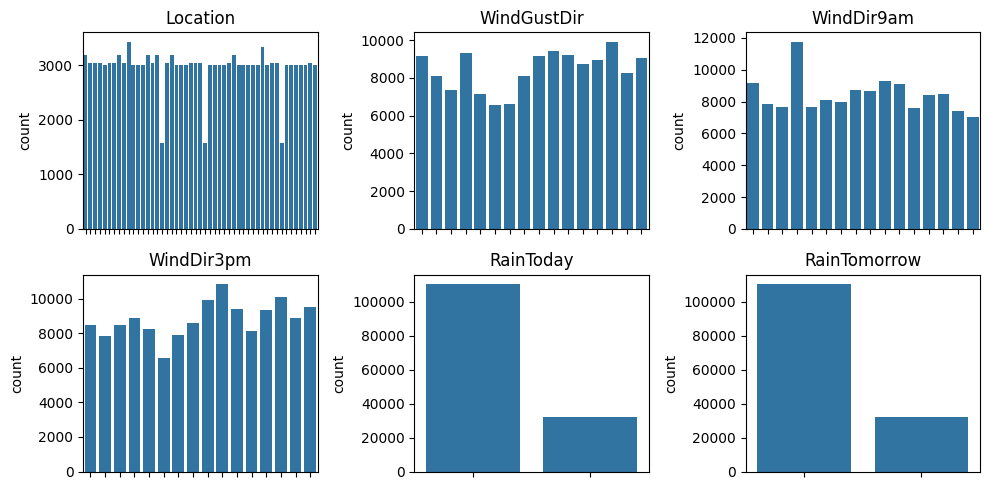

In [35]:
# Creamos una grilla de gráficos de barras
plot_graph_on_grid(df, columns=cat_columns, num_cols=3, graph_type='bar')

<p><em>
Podemos observar que hay un gran desbalance de clases en la variable <code>RainToday</code> y en la variable objetivo <code>RainTomorrow</code>, en donde el porcentaje es el siguiente:
</em></p>

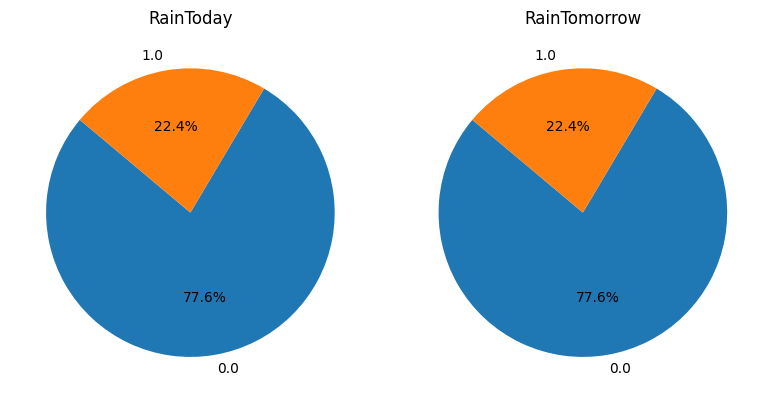

In [36]:
# Creamos una grilla de graficos pie
plot_graph_on_grid(df, columns=['RainToday', 'RainTomorrow'], num_cols=2, graph_type='pie', figsize=(8, 4))

<p><em>
Este punto lo tenemos que tratar en otra sección: <strong>Clases desbalanceadas</strong>
</p></em>

Analizamos la oblicuidad utilizando el estimador por defecto:

In [37]:
# Calculamos la oblicuidad de cada columna.
skewness = df.skew(numeric_only=True)
skewness

MinTemp          0.021188
MaxTemp          0.220839
Rainfall         9.836225
Evaporation      3.761286
Sunshine        -0.496480
WindGustSpeed    0.874879
WindSpeed9am     0.777630
WindSpeed3pm     0.628215
Humidity9am     -0.483969
Humidity3pm      0.033614
Pressure9am     -0.095524
Pressure3pm     -0.045621
Cloud9am        -0.229082
Cloud3pm        -0.226384
Temp9am          0.088540
Temp3pm          0.237960
RainToday        1.322672
RainTomorrow     1.322753
dtype: float64

<p><em>
Para mayor facilidad, analizamos los valores que son están alejados 0.5 del 0:
</p></em>

In [38]:
skewed_colums = skewness[abs(skewness) > 0.5]
skewed_colums

Rainfall         9.836225
Evaporation      3.761286
WindGustSpeed    0.874879
WindSpeed9am     0.777630
WindSpeed3pm     0.628215
RainToday        1.322672
RainTomorrow     1.322753
dtype: float64

<p><em>
Podemos observar que las columnas con mas oblicuidad son <code>Rainfall</code> y <code>Evaporation</code>. Ambos sesgados a la derecha (cola pesada hacia la derecha).
</em></p>

Analizamos la curtosis para las columnas continuas (utilizando el estimador por defecto):

In [39]:
kurtosis = df.kurtosis(numeric_only=True)
kurtosis

MinTemp           -0.483972
MaxTemp           -0.224630
Rainfall         178.152079
Evaporation       45.043266
Sunshine          -0.829459
WindGustSpeed      1.418642
WindSpeed9am       1.226991
WindSpeed3pm       0.763858
Humidity9am       -0.037555
Humidity3pm       -0.511363
Pressure9am        0.231563
Pressure3pm        0.129172
Cloud9am          -1.538830
Cloud3pm          -1.456525
Temp9am           -0.340523
Temp3pm           -0.136281
RainToday         -0.250541
RainTomorrow      -0.250329
dtype: float64

<p><em>
Realizamos el mismo proceso que en el paso anterior y analizamos aquellas variables que tienen una crutosis que se aleja más de 5 del 0:
</em></p>

In [40]:
kurtosis_colums = kurtosis[abs(kurtosis) > 5]
kurtosis_colums

Rainfall       178.152079
Evaporation     45.043266
dtype: float64

<p><em>
Podemos ver que los atributos <code>Rainfall</code> y <code>Evaporation</code> son los que tienen mayor distancia de 0. Ambas leptocúrticas.

Como también están sesgadas, hay una gran posibilidad de que se tenga que hacer un tratamiento diferentes de los datos.
</em></p>

Verificamos los histogramas de las variables para validar las métricas anteriores:

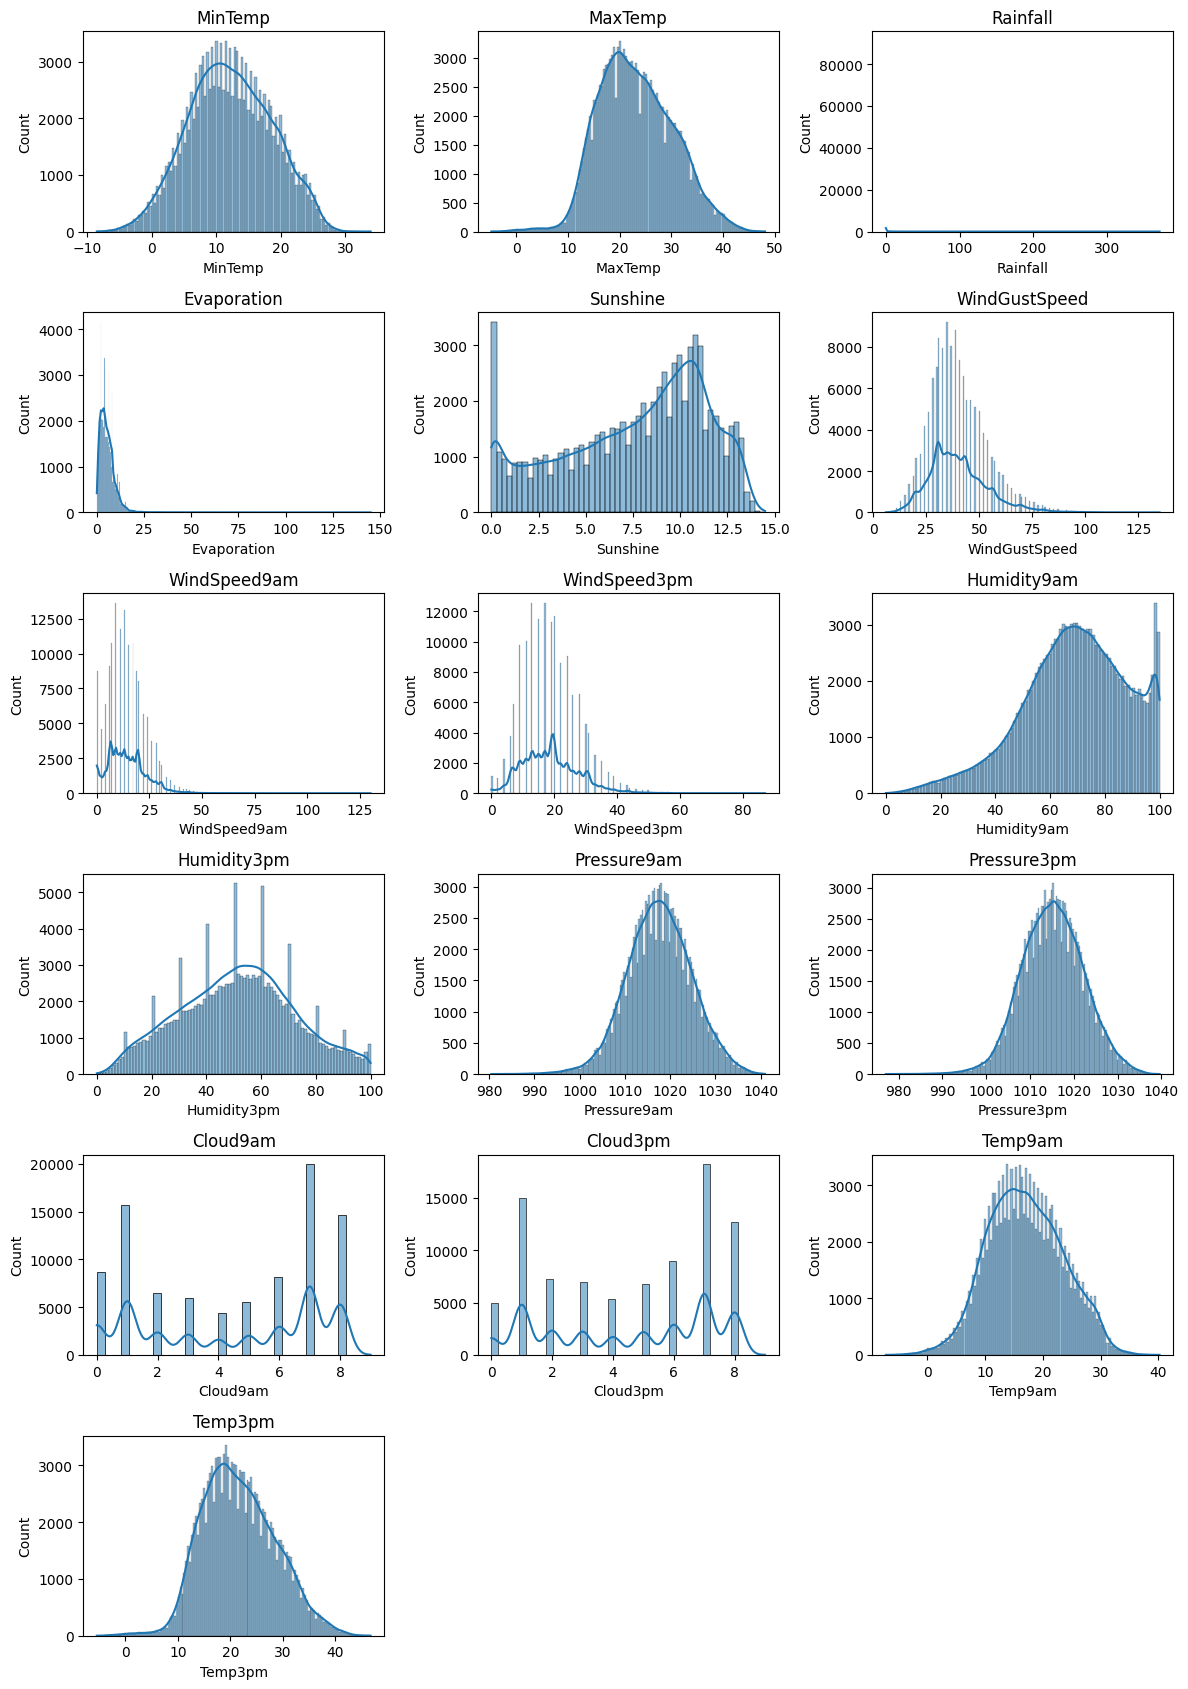

In [41]:
plot_graph_on_grid(df, columns=cont_columns, num_cols=3, graph_type='hist', figsize=(12, 17))

<p><em>
Luego de analizado los histogrmas para verificar las métricas anteriores, notamos algo importante. Las columnas <code>Clould9am</code> y <code>Cloud3pm</code> tienen una baja cardinalidad. Es más, los únicos valores son:
</em></p>

In [42]:
unique_values = {col: df[col].unique() for col in ['Cloud9am', 'Cloud3pm']}
print_unique_values(unique_values)

Columna: Cloud9am
[nan  7.  2.  5.  3.  8.  0.  4.  6.  1.  9.]

Columna: Cloud3pm
[nan  5.  6.  7.  3.  2.  1.  0.  8.  4.  9.]



<p><em>
Por lo que al pricipio fueron definidas como "Cuantitativa-Continua" sería más bien una variable "Cuantitativa-Discreta":

- `Cloud9am` → Tipo: Cuantitativa-Discreta | Datos específicos según hora del día
- `Cloud3pm` → Tipo: Cuantitativa-Discreta | Datos específicos según hora del día

</em></p>

Otro punto para verificar la normalidad de los datos, es hacer gráficos de QQ-plot:

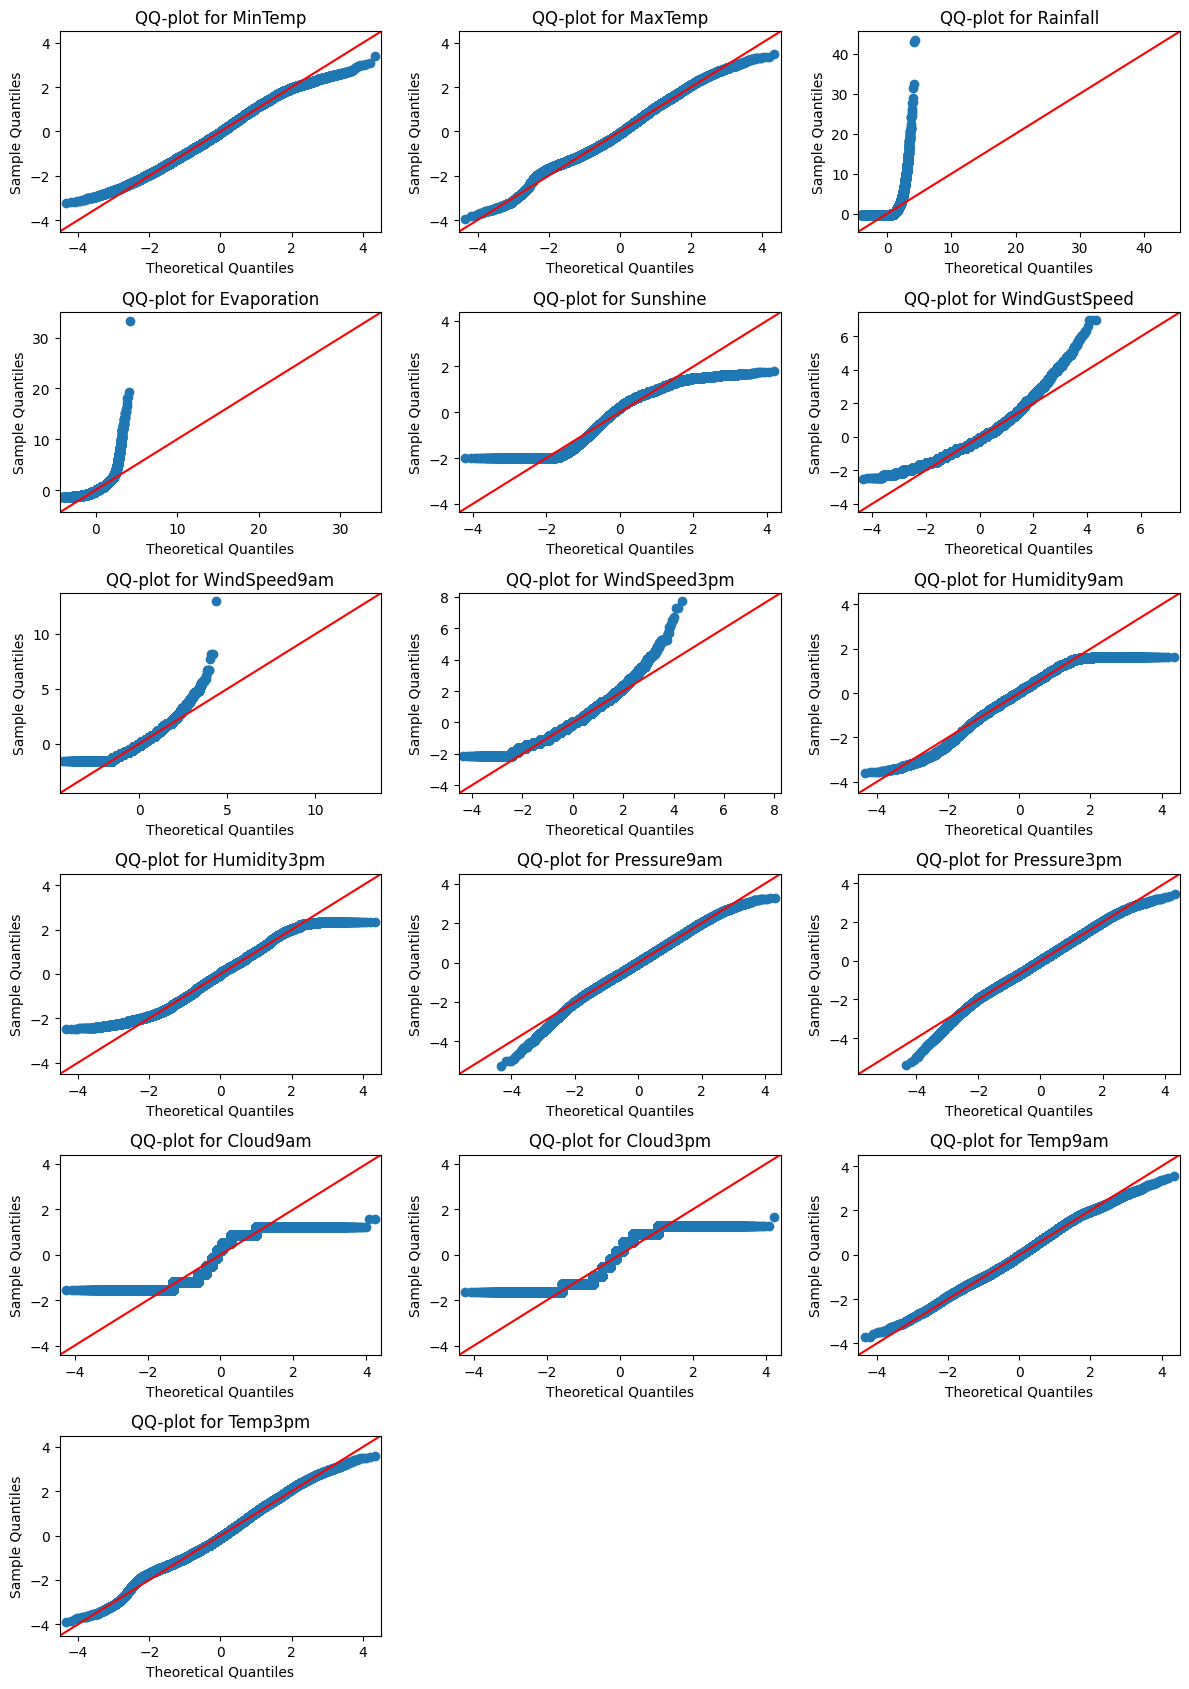

In [43]:
plot_graph_on_grid(df, columns=cont_columns, num_cols=3, graph_type='qq-plot', figsize=(12, 17))

<p><em>
Del gráfico podemos verificar las medidas anteriores obtenidas (la no normalidad de las columnas antes analizadas).
</em></p>

###### Valores faltantes

Analizamos los valores faltantes de todas las columnas:

In [44]:
missing_values_df = df.isna().sum().reset_index()
missing_values_df.columns = ['Columna', 'Valores faltantes']

# Calcular el porcentaje de valores faltantes por columna
missing_percentage = (df.isna().sum() / len(df))
missing_values_df['Proporción de faltantes'] = missing_percentage.values.round(2)

# Ordenar de forma descendente según el porcentaje
missing_values_df = missing_values_df.sort_values(by='Proporción de faltantes',
                                                  ascending=False)

missing_values_df

,Columna,Valores faltantes,Proporción de faltantes
6,Sunshine,69835,0.48
5,Evaporation,62790,0.43
18,Cloud3pm,59358,0.41
17,Cloud9am,55888,0.38
16,Pressure3pm,15028,0.10
15,Pressure9am,15065,0.10
8,WindGustSpeed,10263,0.07
9,WindDir9am,10566,0.07
7,WindGustDir,10326,0.07
10,WindDir3pm,4228,0.03


<p><em>
Como podemos observar, hay muchos datos faltantes que deben ser analizados en las siguientes secciones.
</em></p>

Analizamos los valores faltantes de las columnas <code>RainToday</code> y <code>RainTomorrow</code>.

In [45]:
columns = ["RainToday", "RainTomorrow"]
for column in columns:
    print(df[column].value_counts())
    print_missing_perc(df, column)
    print()

RainToday
0.0    110319
1.0     31880
Name: count, dtype: int64
Porcentaje de valores faltantes en la columna RainToday: 2.2%

RainTomorrow
0.0    110316
1.0     31877
Name: count, dtype: int64
Porcentaje de valores faltantes en la columna RainTomorrow: 2.2%



<p><em>
Se observa que la distribución de los valores que asumen las columnas son muy similares, lo cual tiene sentido debido a que el dataset elegido es una serie temporal y el valor de <code>RainTomorrow</code> en una observación es el valor de <code>RainToday</code> para el día siguiente.

Encontramos además la misma proporción de valores nulos en ambas columnas.
</em></p>

Analizamos las columnas <code>Date</code> y <code>Location</code>.

Para evaluar la coherencia interna del dataset verificamos que no haya observaciones con valor nulo en <code>RainTomorrow</code>, teniendo la observación del día siguiente con valor existente en la columna <code>RainToday</code>, para una misma estación meteorológica.

In [46]:
diff_one_day = df["Date"].shift(-1) - df["Date"] == pd.Timedelta("1 day")
same_location = df["Location"] == df["Location"].shift(-1)
na_today_value_tomorrow = df["RainTomorrow"].isna() & ~(df["RainToday"].shift(-1).isna())

filt = diff_one_day & same_location & na_today_value_tomorrow
assert df.loc[filt, :].shape[0] == 0

Graficamos las observaciones diarias en función de la estación meteorológica para ver con que registros contamos.

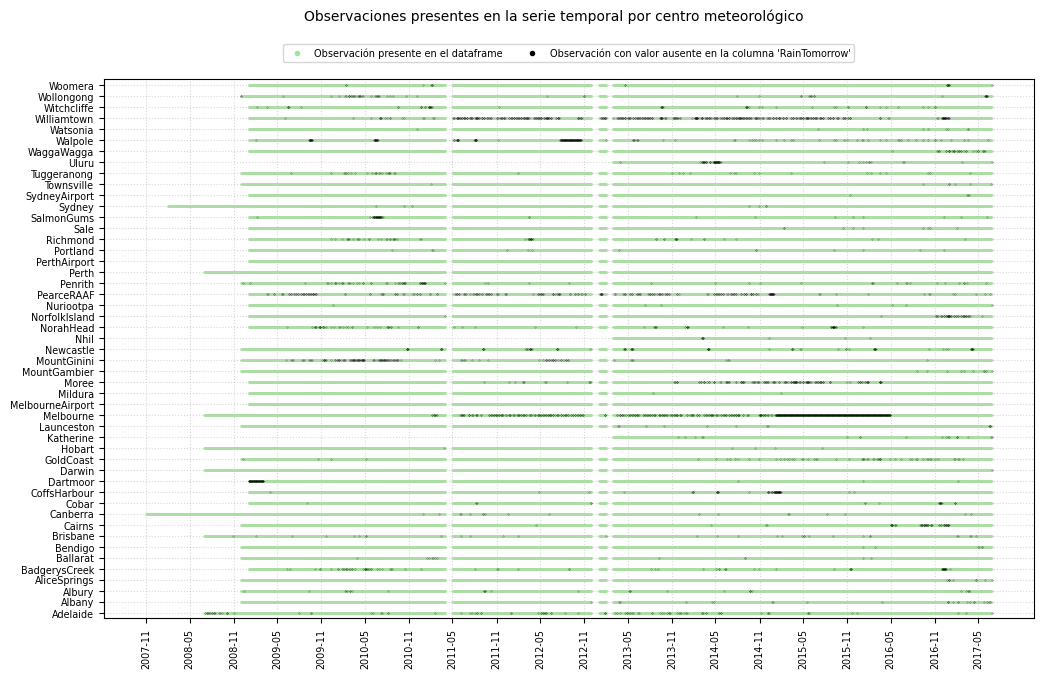

In [47]:
plot_locations_over_time(df, color=spectral_palette[7])

<p><em>
Se observa que tenemos registros faltantes correspondientes a meses enteros para todas las estaciones meteorológicas. Además podemos observar que el inicio de la serie temporal para cada una de ellas difiere, siendo la observación más antigua de noviembre 2007.

Encontramos que en algunas de las localidades contamos con mayor cantidad de valores nulos en la columna target <code>RainTomorrow</code>. A priori esperábamos encontrar que los valores nulos para esa variable se encontraran dónde la serie temporal se corta, sin embargo podemos ver que aparecen aleatoriamente a lo largo de la serie temporal, y que en algunas locaciones incluso tenemos datos válidos en la variable <code>RainTomorrow</code> a pesar de no contar con una observación para el día siguiente al registrado.

Las estaciones con mayor cantidad de datos faltantes en la variable target son Melbourne y Wiliamtown. En lo que a Melbourne concierne, podemos observar que hay registros también en el aeropuerto de esa ciudad, por lo que podemos inferir que los patrones cimáticos de una de esas estaciones puede brindar información de utilidad para predecir si llueve al día siguiente en la otra. Extendiendo a todas las estaciones meteorológicas entendemos que incorporar la posición geográfica puede resultar de gran utilidad para el desarrollo de nuestro modelo predictivo.
</em></p>

###### Valores atípicos

Para la detección de valores atípicos, primeramente realizamos diagramas de cajas para visualizar los datos. Estos diagramas de cajas también nos permiten las características anteriormente medidas, como la oblicuidad, media, mediana, etc; y así también validar estas métricas antes obtenidas.

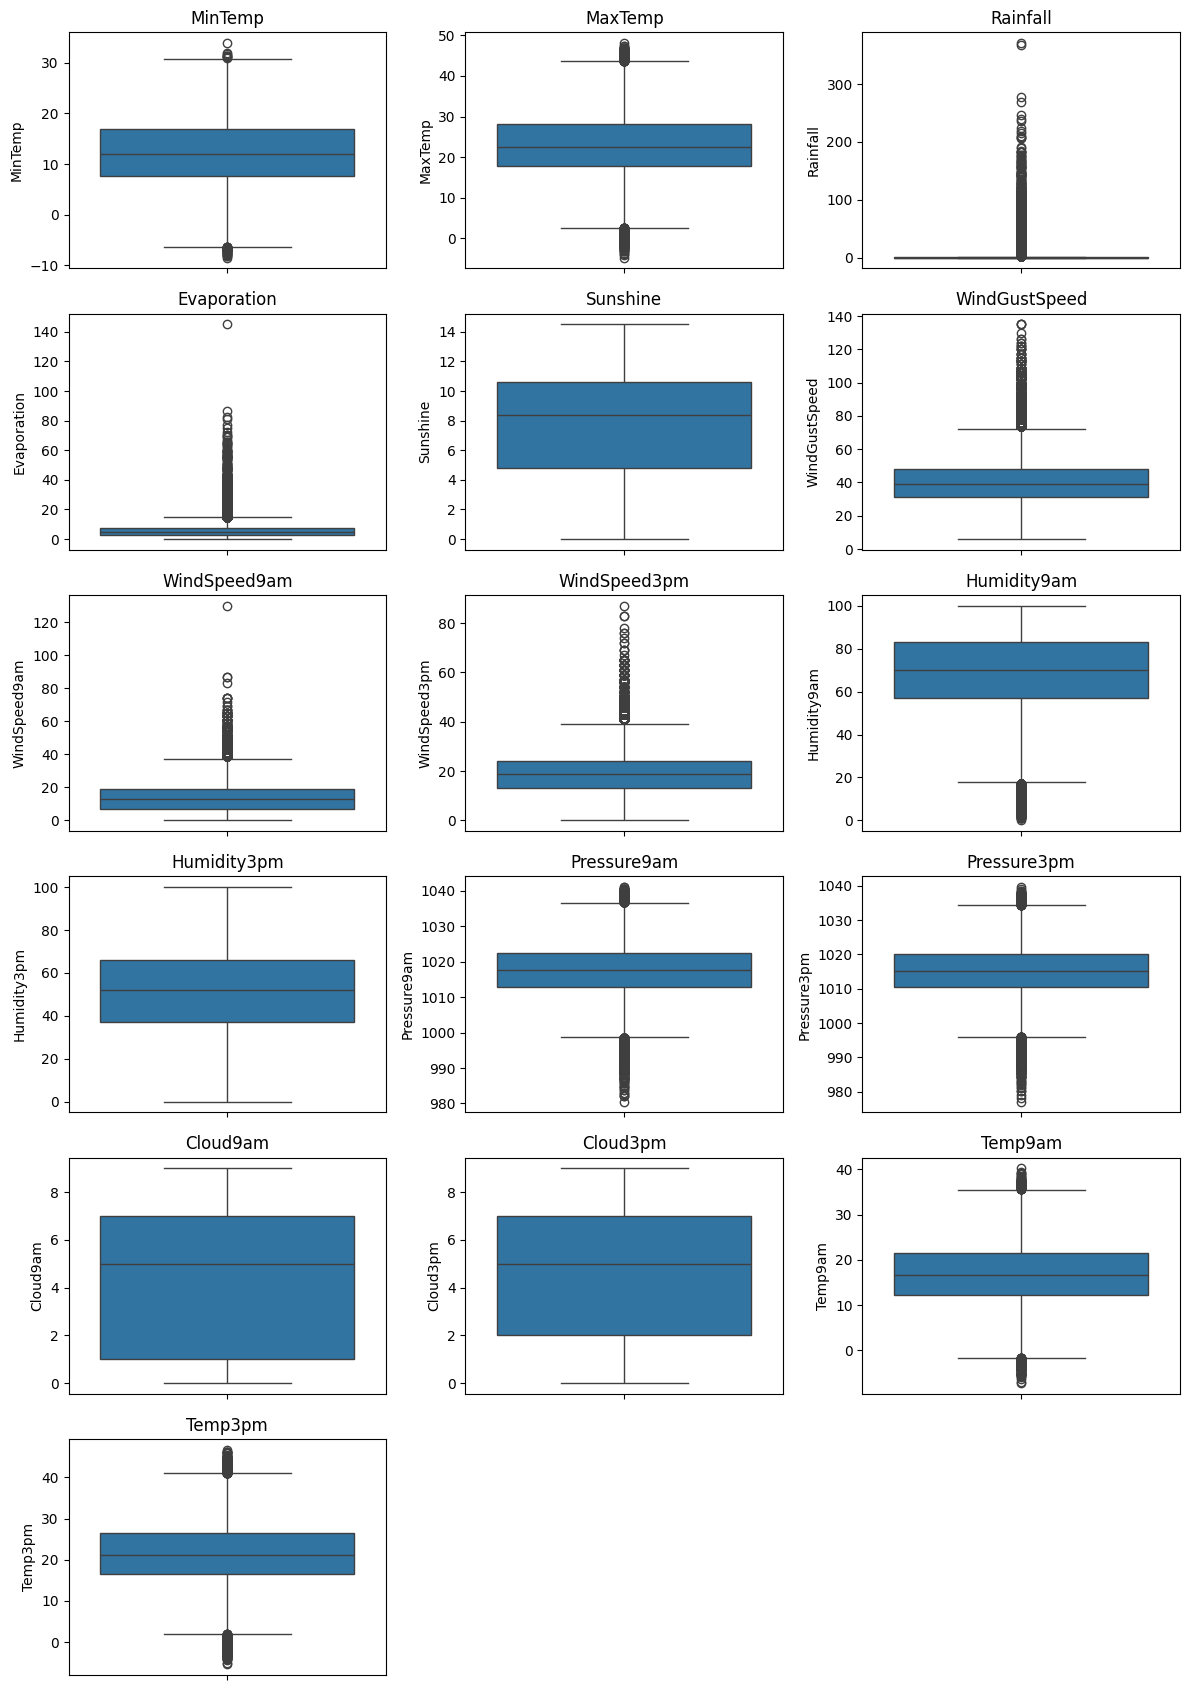

In [48]:
plot_graph_on_grid(df, columns=cont_columns, num_cols=3, graph_type='box-plot', figsize=(12, 17))

<p><em>
Podemos observar que las siguentes columnas tienen outlíers:
</em></p>

- <code>MinTemp</code>
- <code>MaxTemp</code>
- <code>RainFall</code>
- <code>Evaporation</code>
- <code>WindGustSpeed</code>
- <code>WindSpeed9am</code>
- <code>WindSpeed3pm</code>
- <code>Humidity9am</code>
- <code>Pressure9am</code>
- <code>Pressure3pm</code>
- <code>Temp9am</code>
- <code>Temp3pm</code>

Porcentaje de outliers según IRQ y desviacón estándar:

In [49]:
outliers = outliers_iqr(df, cont_columns).sort_values(by='IRQ-Percentage', ascending=False)
outliers

,Column,IRQ-Percentage,3Std-Percentage,IRQ-Count,3Std-Count
2,Rainfall,17.58,1.69,25578,142199
5,WindGustSpeed,2.13,0.94,3092,135197
7,WindSpeed3pm,1.73,0.66,2523,142398
3,Evaporation,1.37,0.60,1995,82670
6,WindSpeed9am,1.25,0.94,1817,143693
8,Humidity9am,0.98,0.32,1425,142806
10,Pressure9am,0.82,0.35,1191,130395
11,Pressure3pm,0.63,0.29,919,130432
15,Temp3pm,0.53,0.27,764,141851
1,MaxTemp,0.34,0.23,489,144199


<p><em>
Con la tabla podemos observar que aquellas columnas que se alejan de la distribución normal, como por ejemplo <code>Rainfall</code>, lo correcto sería tratar muchos más outliers mediante el rango inter cuartílico (que utiliza la mediana) que mediante la desviación estandar (que utiliza la media).
</em></p>

###### Correlación entre datos

Análisis de correlación linear de los datos:

In [50]:
# Correlación de los datos
correlation_matrix = df.corr(numeric_only=True, method='pearson')
correlation_matrix

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
MinTemp,1.000000,0.736555,0.103938,0.466993,0.072586,0.177415,0.175064,0.175173,-0.232899,0.006089,-0.450970,-0.461292,0.078754,0.021605,0.901821,0.708906,0.055836,0.083936
MaxTemp,0.736555,1.000000,-0.074992,0.587932,0.470156,0.067615,0.014450,0.050300,-0.504110,-0.508855,-0.332061,-0.427167,-0.289370,-0.277921,0.887210,0.984503,-0.229192,-0.159237
Rainfall,0.103938,-0.074992,1.000000,-0.064351,-0.227549,0.133659,0.087338,0.057887,0.224405,0.255755,-0.168154,-0.126534,0.198528,0.172403,0.011192,-0.079657,0.501516,0.239032
Evaporation,0.466993,0.587932,-0.064351,1.000000,0.365602,0.203021,0.193084,0.129400,-0.504092,-0.390243,-0.270362,-0.293581,-0.183793,-0.182618,0.545115,0.572893,-0.186945,-0.119285
Sunshine,0.072586,0.470156,-0.227549,0.365602,1.000000,-0.034750,0.005499,0.053834,-0.490819,-0.629130,0.041970,-0.019719,-0.675323,-0.703930,0.291188,0.490501,-0.330522,-0.450768
WindGustSpeed,0.177415,0.067615,0.133659,0.203021,-0.034750,1.000000,0.605303,0.686307,-0.215070,-0.026327,-0.458744,-0.413749,0.071736,0.109168,0.150150,0.032748,0.155761,0.234010
WindSpeed9am,0.175064,0.014450,0.087338,0.193084,0.005499,0.605303,1.000000,0.519547,-0.270858,-0.031614,-0.228743,-0.175817,0.025112,0.054639,0.128545,0.004569,0.103057,0.090995
WindSpeed3pm,0.175173,0.050300,0.057887,0.129400,0.053834,0.686307,0.519547,1.000000,-0.145525,0.016432,-0.296351,-0.255439,0.053337,0.025396,0.163030,0.027778,0.080591,0.087817
Humidity9am,-0.232899,-0.504110,0.224405,-0.504092,-0.490819,-0.215070,-0.270858,-0.145525,1.000000,0.666949,0.139442,0.186858,0.452297,0.357326,-0.471354,-0.498399,0.353708,0.257161
Humidity3pm,0.006089,-0.508855,0.255755,-0.390243,-0.629130,-0.026327,-0.031614,0.016432,0.666949,1.000000,-0.027544,0.051997,0.517120,0.523120,-0.221019,-0.557841,0.379020,0.446160


Para mejor visualización realizamos un mapa de calor:

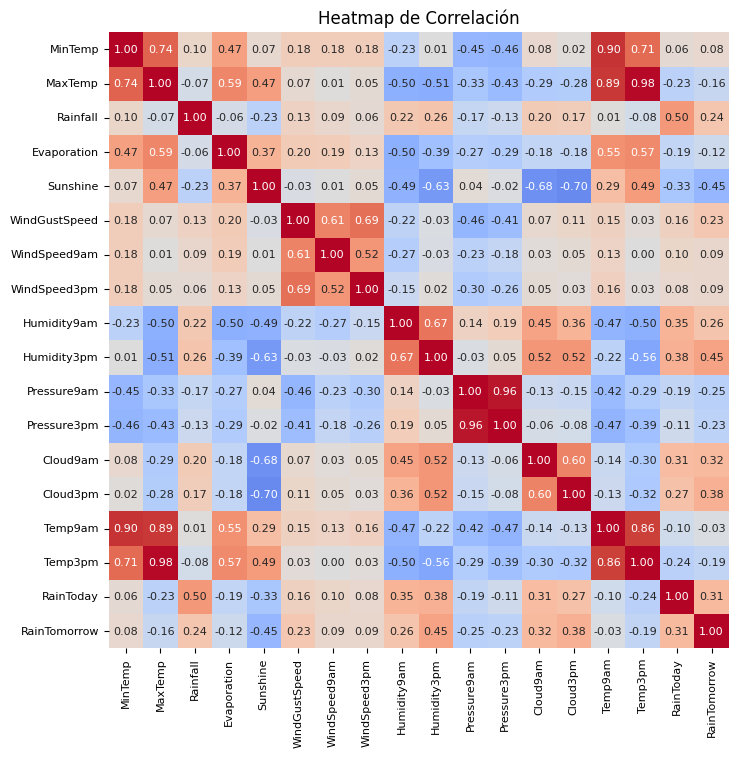

In [51]:
plot_heatmap(correlation_matrix)

<p><em>
Podemos apreciar que hay datos que están bastante corelacionados. Para mejor observación, graficamos las columnas cuya correlación es mayor a 0.75 (establecidos como correlación de intensidad fuerte):
</em></p>

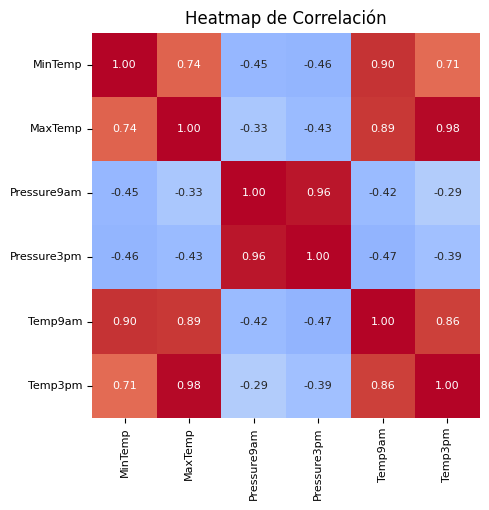

In [52]:
# Eliminar la diagonal principal (auto-correlaciones)
mask = np.eye(len(correlation_matrix), dtype=bool)
correlation_matrix_no_diag = correlation_matrix.where(~mask)

# Encontrar columnas altamente correlacionadas
high_corr_columns = correlation_matrix_no_diag.columns[correlation_matrix_no_diag.abs().max() > 0.75]
high_corr_matrix = correlation_matrix.loc[high_corr_columns, high_corr_columns]

plot_heatmap(high_corr_matrix, figsize=(5, 5))

<p><em>
En este punto podemos ver las siguientes correlaciones fuertes:

<code>MinTemp</code> ⟷ <code>Temp9am</code>

<code>MaxTemp</code> ⟷ <code>Temp3am</code> | <code>Temp9am</code>

<code>Pressure9am</code> ⟷ <code>Pressure3pm</code>

<code>Temp3am</code> ⟷ <code>Temp9am</code>

La relación en todos los casos es directa.

Estas correlaciones hay que tenerlas en cuenta a la hora de entrenamor modelos que son suceptibles a este tipo de correlación (ej: modelos lineales). También hay que tener en cuenta estas correlaciones en el caso de necesitar imputación de datos.
</em></p>

Otra forma de ver la correlación y afirmar aún más nuestras hipotesis, es graficando par a par (pairplot):

In [53]:
# sns.pairplot(df)
columnas = list(set(cont_columns) -
                set(['Cloud9am', 'Cloud3pm']) | set(["RainTomorrow"]))
sns.pairplot(
    df[columnas].sample(10000, random_state=random_state),
    hue="RainTomorrow",
    palette=[spectral_palette[9], spectral_palette[1]],
    diag_kind="kde",
    plot_kws={'alpha': 0.2}
)

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x000002133607A160> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

<p><em>
En este ploteo podemos observar la correlación lineal entre ciertas variables analizadas anteriormente. Además, encontramos que las variables <code>Humidity3pm</code> y <code>Sunshine</code> resultan sumamente promimsorias para la separación de clases en la variable objetivo. Sin embargo, recordamos que la variable <code>Sunshine</code> posee datos faltantes en casi la mitad de los registros. Realizar un buen trabajo de imputación de datos faltantes resulta entonces indispensable para obtener una buena performance en nuestro tarea predictiva.
</em></p>

Análisis de la correlación según <code>Date</code> y <code>Location</code>.

Geolocalizamos las estaciones meteorológicas utilizando el servicio Open Street Map para obtener la posición geográfica de cada una de ellas.

In [55]:
country = "Australia"

world = gpd.read_file(get_path('naturalearth_lowres'))
gdf_australia = world[world.name == country]

# Solve manually some mistaken names
mapping_dict = {"Dartmoor": "DartmoorVillage", "Richmond": "RichmondSydney"}

# Una vez aplicado map, quedan valores NaN, por lo que se completa con los valores que ya tenía,
# o sea para cualquier valor que sea NaN después de aplicar map(),
# usa el valor original que estaba en esa posición en la columna 'Location
df["Location"] = df["Location"].map(mapping_dict).fillna(df["Location"])

locations = df["Location"].unique()

# Separa las ubicaciones en camelCase con un espacio. Ej: NorthRyde -> North Ryde
locations = [re.sub(r'([a-z])([A-Z])', r'\1 \2', l) for l in locations]

locs = []
lats = []
lons = []
for location in locations:
    try:
        lat, lon = ox.geocode(location + f", {country}")

        locs.append(location.replace(" ", ""))
        lats.append(lat)
        lons.append(lon)
    except Exception as e:
        print(f"Error retrieving coordinates for {location}: {e}")

df_locations = pd.DataFrame({
    'Location': locs,
    'Lat': lats,
    'Lon': lons
})
geometry = [Point(lon, lat) for lon, lat in zip(
    df_locations['Lon'], df_locations['Lat'])]
gdf_locations = gpd.GeoDataFrame(
    df_locations, geometry=geometry, crs="EPSG:4326")
gdf_locations.to_file('./data/gdf_locations.geojson', driver='GeoJSON')

C:\Users\User\AppData\Local\Temp\ipykernel_9304\2567505955.py:3: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(get_path('naturalearth_lowres'))


In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
gdf_australia.plot(ax=ax, edgecolor='k', facecolor=spectral_palette[4])

# Plot locations
gdf_locations.plot(ax=ax, marker='o', color='black',
                   markersize=10, label='Locations')

for idx, row in gdf_locations.iterrows():
    ax.text(
        row['geometry'].x,
        row['geometry'].y + .2,
        row['Location'],
        fontsize=5,
        ha='center',
        va='bottom'
    )

ax.set_xticks([])
ax.set_yticks([])

ax.set_aspect('equal', adjustable='box')

plt.title(
    "Ubicación de las estaciones meteorológicas observadas",
    fontsize=10,
)

plt.show()

<p><em>
Podemos ver una gran cantidad de estaciones meteorológicas concentradas en la costa sureste de Australia, y en menor medida en la costa suroeste. Además notamos que algunas de las estaciones se encuentran muy cercanas entre si, lo cual puede traer aparejado una correlación entre los patrones climáticos.
</em></p>

Analizamos el coeficiente Phi para la variable <code>RainToday</code> comparando entre pares de estaciones meteorológicas y cruzando con la información de la distancia euclideana entre ellas.

In [ ]:
locations = df["Location"].unique()
location_pairs = list(combinations(locations, 2))

df_location_pairs = pd.DataFrame(location_pairs, columns=['LocationA', 'LocationB'])
df_location_pairs['phi'] = np.nan
df_location_pairs['pvalue'] = np.nan

for index, row in df_location_pairs.iterrows():
    loc1, loc2 = row['LocationA'], row['LocationB']
    df_pair = df[df['Location'].isin([loc1, loc2])]
    df_pivot = df_pair.pivot(index='Date', columns='Location', values='RainToday').dropna()

    if not df_pivot.empty:
        confusion_matrix = pd.crosstab(df_pivot[loc1], df_pivot[loc2])
        phi, pvalue = phi_coefficient(confusion_matrix.values)
        df_location_pairs.at[index, 'phi'] = phi
        df_location_pairs.at[index, 'pvalue'] = pvalue

In [ ]:
df_location_a = df_location_pairs[["LocationA"]].merge(
    gdf_locations[["Location", "geometry"]],
    how="left",
    left_on="LocationA",
    right_on="Location",
)
gdf_location_a = gpd.GeoDataFrame(df_location_a, geometry="geometry")
gdf_location_a_gda94 = gdf_location_a.to_crs(epsg=3112)

df_location_b = df_location_pairs[["LocationB"]].merge(
    gdf_locations[["Location", "geometry"]],
    how="left",
    left_on="LocationB",
    right_on="Location",
)
gdf_location_b = gpd.GeoDataFrame(df_location_b, geometry="geometry")
gdf_location_b_gda94 = gdf_location_b.to_crs(epsg=3112)

distance_ab = gdf_location_a_gda94["geometry"].distance(gdf_location_b_gda94["geometry"])

df_location_pairs["distance"] = distance_ab / 1000 # distance in kilometers

In [ ]:
df_location_pairs.sort_values(by="phi", ascending=False).head(10)

<p><em>
Observamos que, tal como intuíamos, las estaciones con mayor coeficiente Phi tienen entre si para la variable <code>RainToday</code>, son aquellos que se encuentran cerca geográficamente.
</em></p>

Vamos a gráficar la relación entre la distancia geográfica y la correlación calculada mediante el coeficiente Phi para todos los pares de estaciones meteorológicas en el dataset.

In [ ]:
plt.figure(figsize=(8, 8))

df_location_pairs["significant"] = df_location_pairs['pvalue'] <= .05
colors = [spectral_palette[10] if sig else spectral_palette[2] for sig in df_location_pairs['significant']]

sc = plt.scatter(df_location_pairs['phi'], np.log(df_location_pairs['distance']),
                 s=12, c=colors, alpha=.8, edgecolors='w', linewidth=0.5)

plt.legend(handles=[
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=spectral_palette[10], markersize=5, label='p-value <= 0.05'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=spectral_palette[2], markersize=5, label='p-value > 0.05')
])

plt.xlabel('Phi Coefficient')
plt.ylabel('Log de la distancia en km')
plt.title('Phi coefficient entre dos localidades vs distancia entre ellas\nutilizando la variable binaria RainToday para cada día')

plt.show()

<p><em>
Efectivamente, encontramos una importante correlación visual entre ambas variables graficadas: la distancia y la correlación para la variable <code>RainToday</code> para cada par de estaciones.

Esta situación resulta interesante en cuanto refuerza nuestra hipótesis de que la codificación espacial de las estaciones meteorológicas resulta informativa para un modelo encargado de predecir lluvia para el día siguiente.

Además, entendemos que debemos de estar atentos al momento de dividir nuestro dataset para entrenamiento y testeo del mismo. Si entrenamos nuestro modelo con datos de un día específico en estaciones meteorológicas cercanas entre si, y luego lo testeamos con una observación del mismo día pero de otra estación también cercana, corremos el riesgo de que el modelo aprenda que en esa zona geográfica llovió al día siguiente en lugar de realmente realizar una predicción desconociendo el futuro. Por esto consideramos que nuestro set de testeo y validación debe comprender un periodo de tiempo definido e incluir a todas las estaciones para ese período.
</em></p>

Finalmente vamos a analizar la relación existente entre la variables categóricas relacionadas a la dirección que puede tomar el viento. Como vimos anteriormente son 16 las categorías posibles.

In [ ]:
wind_dir_columns = ["WindGustDir", "WindDir9am", "WindDir3pm"]

uniques_dirs = set(chain.from_iterable(df[column].unique() for column in wind_dir_columns))
print("Valores tipo string en las columnas WindDir: ", ' - '.join(d for d in uniques_dirs if isinstance(d, str)))
print("Otros valores en las columnas WindDir: ",' - '.join(str(d) for d in uniques_dirs if not isinstance(d, str)))

Se observan 16 categorías, cada una de ellas representando una dirección posible del viento con una resolución de 22.5°. Vamos a transformar la dirección del viento a grados considerando la dirección 'E' como nuestro 0° (y por lo tanto también nuestro 360°). Este método nos permitirá ordenar los valores para poder analizar graficamente la relación entre las variables WindDir9am y WindDir3pm.

In [ ]:
df_wind_dir = df[wind_dir_columns]

dirs = ["E", "ENE", "NE", "NNE", "N", "NNW", "NW", "WNW", "W", "WSW", "SW", "SSW", "S", "SSE", "SE", "ESE"]
angles = list(np.arange(0, 360, 22.5))
mapping_dict = {d: a for (d, a) in zip(dirs, angles)}

df_wind_dir[wind_dir_columns] = df_wind_dir[wind_dir_columns].applymap(lambda x: mapping_dict.get(x, x))

In [ ]:
confusion_matrix = pd.crosstab(df_wind_dir["WindDir9am"], df_wind_dir["WindDir3pm"])

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='coolwarm', xticklabels=dirs, yticklabels=dirs, cbar=False)
plt.xlabel('WindDir9am')
plt.ylabel('WindDir3pm')
plt.title('Confusion Matrix Heatmap')
plt.show()

_Se observa una estrecha relación visual entre la dirección del viento registrada a las 9am y la dirección del viento registrada a las 3pm. Debido a la condición circular de las posibles direcciones que el viento puede tomar, aparecen valores altos en las esquinas inferior izquierda y superior derecha del gráfico._

##### 2.1.5.2. Requerimientos de datos

Como resumen del análisis de datos, éstos presentan la siguiente información:

<font color='blue'>ℹ</font> El conjunto contiene un total de <code>145460</code> observaciones.

<font color='blue'>ℹ</font> Las columnas cualitativas-nominales son: <code>WindGustDir</code> | <code>WindDir9am</code> | <code>WindDir3pm</code> | <code>Location</code>

<font color='blue'>ℹ</font> Las columnas cuantitativas-continuas son: <code>MinTemp</code> | <code>MaxTemp</code> | <code>Rainfall</code> | <code>Evaporation</code> | <code>Sunshine</code> | <code>WindGustSpeed</code> | <code>WindSpeed9am</code> | <code>WindSpeed3pm</code> | <code>Humidity9am</code> | <code>Humidity3pm</code> | <code>Pressure9am</code> | <code>Pressure3pm</code> | <code>Cloud9am</code> | <code>Cloud3pm</code> | <code>Temp9am</code> | <code>Temp3pm</code>

<font color='blue'>ℹ</font> Hay una columna booleana: <code>RainToday</code>

<font color='blue'>ℹ</font> Hay una columna del tipo fecha: <code>Date</code>

<font color='green'>✔</font> La variable objetivo es del tipo booleanna: <code>RainTomorrow</code>

<font color='green'>✔</font> No presentan datos duplicados.

<font color='red'>❌</font> Gran propoción de valores nulos en: <code>Evaporation</code> | <code>Sunshine</code> | <code>Cloud9am</code> | <code>Cloud3pm</code>

<font color='green'>✔</font> No hay valores nulos en las columnas: <code>Date</code> | <code>Location</code>

<font color='green'>✔</font> Máximos y mínimos acordes.

<font color='yellow'>⚠</font> Hay un desbalance de clases en la variable target.

<font color='green'>✔</font> Hay muchas columnas que se pueden estandarizar y siguen una distribución cuasi-normal como: <code>MinTemp</code> | <code>MaxTemp</code> | <code>Humidity3pm</code> | <code>Pressure9am</code> | <code>Pressure3pm</code> | <code>Temp9am</code>

<font color='yellow'>⚠</font> Hay columnas que son no-normales como: <code>Rainfall</code> | <code>Evaporation</code>

<font color='yellow'>⚠</font> Hay columnas que tienen colas pesadas y livianas como: <code>Sunshine</code> | <code>WindGustSpeed</code> | <code>WindSpeed9am</code> | <code>WindSpeed3pm</code> | <code>Humidity9am</code>

<font color='yellow'>⚠</font> Las columnas <code>Colud9am</code> y <code>Cloud3pm</code> podrían llevar un tratamiento de cuantitativas-discretas.

<font color='yellow'>⚠</font> Hay valores faltantes en el resto de las columnas, pero la mayoría (del 40 para arriba son las columnas): <code>Evaporation</code> | <code>Sunshine</code> | <code>Cloud9am</code> | <code>Cloud3pm</code>

<font color='blue'>ℹ</font> Hay relación entre los datos faltantes (<code>RainTomorrow</code>), fechas y localidades.

<font color='red'>❌</font> La columna <code>RainFall</code> contiene muchos outliers.

<font color='yellow'>⚠</font> Hay variables áltamente co-relacionadas como:
- <code>MinTemp</code> ⟷ <code>Temp9am</code>
- <code>MaxTemp</code> ⟷ <code>Temp3am</code> | <code>Temp9am</code>
- <code>Pressure9am</code> ⟷ <code>Pressure3pm</code>
- <code>Temp3am</code> ⟷ <code>Temp9am</code>

#### 2.1.6. Revisión de los documentos de salida

<!-- TODO: Borrar? -->

Actualmente, el documento de salida es únicamente este notebook autocontenido.

### 2.2. Ingeniería de datos (Data Engineering)

Cargamos los archivos de la etapa anterior:

In [ ]:
# Importamos el conjunto
file_name = './data/weatherAUS.csv'
try:
    df = pd.read_csv(file_name)
    print('Dataset local')
except:
    raise Exception('Error al encontrar el archivo')

Dataset local


In [54]:
# Importamos los tipos de datos
file_name = './data/columnsTypes.json'
try:
    with open(file_name, 'r') as fp:
        columns_types = json.load(fp)
    print('columnsTypes local')
except:
    raise Exception('Error al encontrar el archivo')

columnsTypes local


In [57]:
# Importamos las coordenadas
file_name = './data/gdf_locations.geojson'
try:
    gdf_locations = gpd.read_file(file_name)
    print('gdf_locations local')
except:
    raise Exception('Error al encontrar el archivo')

gdf_locations local


#### 2.2.1. Seleccionar datos

Dado que la variabable objetivo tiene datos *nulos*, primeramente, antes de realizar las diversas transformaciones al conjunto, eliminamos dichos registros del conjunto:

In [58]:
df.dropna(subset=['RainTomorrow'], inplace=True)
df_pre_processed = df.copy()

#### 2.2.2. Limpiar datos

In [59]:
# Creamos el pipeline vacio
data_pipeline = Pipeline(steps=[])
target_pipeline = Pipeline(steps=[])

set_config(transform_output="pandas")

##### 2.2.2.X Tipos de datos

Cargamos las variables que mantiene los tipos de datos:

In [60]:
cat_columns = columns_types['cat_columns']
bool_columns = columns_types['bool_columns'] 
date_columns = columns_types['date_columns']
cont_columns = columns_types['cont_columns']
target_columns = columns_types['target_columns']

Transformamos los datos a sus para ver si no tenemos problemas de datos:

In [61]:
col_types_transf = ColumnTransformer(
    [('categories', FunctionTransformer(to_category), cat_columns),
     ('date', FunctionTransformer(to_datetime), date_columns),
     ('bool', FunctionTransformer(map_bool), bool_columns)],
    remainder='passthrough',
    verbose_feature_names_out=False
)

Probamos el paso:

In [62]:
df = col_types_transf.fit_transform(df)
df['RainTomorrow'] = map_bool(df['RainTomorrow'])
df

,Location,WindGustDir,WindDir9am,WindDir3pm,Date,RainToday,MinTemp,MaxTemp,Rainfall,Evaporation,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow
0,Adelaide,NW,SW,W,2008-07-01,1.0,8.8,15.7,5.0,1.6,...,15.0,92.0,67.0,1017.4,1017.7,NaN,NaN,13.5,14.9,0.0
1,Adelaide,SW,SSW,SW,2008-07-02,0.0,12.7,15.8,0.8,1.4,...,15.0,75.0,52.0,1022.4,1022.6,NaN,NaN,13.7,15.5,0.0
2,Adelaide,W,NNE,SW,2008-07-03,0.0,6.2,15.1,0.0,1.8,...,11.0,81.0,56.0,1027.8,1026.5,NaN,NaN,9.3,13.9,0.0
3,Adelaide,NNE,NNE,NE,2008-07-04,0.0,5.3,15.9,0.0,1.4,...,13.0,71.0,46.0,1028.7,1025.6,NaN,NaN,10.2,15.3,0.0
5,Adelaide,NNW,NNE,NNW,2008-07-06,NaN,11.3,15.7,NaN,NaN,...,22.0,62.0,62.0,1019.5,1016.2,NaN,NaN,13.0,14.4,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,Woomera,N,E,ESE,2017-06-20,0.0,5.6,19.7,0.0,2.2,...,7.0,61.0,28.0,1028.1,1025.9,0.0,NaN,11.1,19.2,0.0
145455,Woomera,ENE,ESE,ESE,2017-06-21,0.0,5.8,19.9,0.0,2.0,...,9.0,52.0,22.0,1027.9,1025.1,1.0,NaN,11.1,19.1,0.0
145456,Woomera,NNE,ENE,NNW,2017-06-22,0.0,7.8,19.0,0.0,1.4,...,17.0,48.0,37.0,1025.8,1022.2,8.0,6.0,11.1,18.0,0.0
145457,Woomera,NNW,N,NW,2017-06-23,0.0,8.0,22.5,0.0,4.0,...,15.0,57.0,31.0,1021.0,1018.2,7.0,3.0,11.5,21.5,0.0


Agregamos estos pasos al pipeline:

In [63]:
target_pipeline.steps.append(('mapping', FunctionTransformer(map_bool)))
target_pipeline

Pipeline(steps=[('mapping',
                 FunctionTransformer(func=<function map_bool at 0x000002133603E5C0>))])

In [64]:
data_pipeline.steps.append(('feature_transf', col_types_transf))
data_pipeline

Pipeline(steps=[('feature_transf',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('categories',
                                                  FunctionTransformer(func=<function to_category at 0x000002133603E480>),
                                                  ['Location', 'WindGustDir',
                                                   'WindDir9am',
                                                   'WindDir3pm']),
                                                 ('date',
                                                  FunctionTransformer(func=<function to_datetime at 0x000002133603E520>),
                                                  ['Date']),
                                                 ('bool',
                                                  FunctionTransformer(func=<function map_bool at 0x000002133603E5C0>),
                                                  ['RainToday'])],
                                   verbose_feature_names_out=False))])

##### 2.2.2.X Tratamiento de outliers

Dado que los atributos `Rainfall`, `Evaporation`, `WindSpeed9am` y `WindSpeed3pm` están oblicuos, utilizaremos el IRQ para el tratamiento de outliers. Se aplicará una transformación que corte dichos valores.

<font color='red'>TODO:</font>

##### 2.2.2.X Valores faltantes


<font color='red'>TODO:</font>
<font color='red'>Estaría faltando probar MICE y luego el tratamiento de
outliers y datos co-relacionados?</font>
<font color='red'>Normailización de variables?</font>

Como se observó en la sección anterior, se tienen variables tanto numéricas como categóricas a las que les faltan algunos valores.

###### Considerando las variables categóricas


Se toma la moda para completar los valores faltantes.

In [ ]:
df_cat_imputed = df.copy()

# Imputación con la Moda para Variables Categóricas
categorical_imputer = SimpleImputer(strategy='most_frequent')
df_cat_imputed[cat_columns] = categorical_imputer.fit_transform(df_cat_imputed[cat_columns])

In [ ]:
missing_values = df_cat_imputed.isna().sum()
observations = len(df_cat_imputed)

missing_values_df = pd.DataFrame({
    'Variable': missing_values.index,
    'Valores faltantes': missing_values.values,
    'Cantidad de observaciones': observations,
    'Porcentaje valores faltantes': (missing_values.values / observations) * 100
})

missing_values_df.sort_values(by="Porcentaje valores faltantes", ascending=0)

,Variable,Valores faltantes,Cantidad de observaciones,Porcentaje valores faltantes
10,Sunshine,67816,142193,47.692924
9,Evaporation,60843,142193,42.789026
19,Cloud3pm,57094,142193,40.152469
18,Cloud9am,53657,142193,37.735332
16,Pressure9am,14014,142193,9.855619
17,Pressure3pm,13981,142193,9.832411
11,WindGustSpeed,9270,142193,6.519308
15,Humidity3pm,3610,142193,2.538803
21,Temp3pm,2726,142193,1.917113
13,WindSpeed3pm,2630,142193,1.849599


In [ ]:
# Chequeamos los valores de nuevo
missing_values = df_cat_imputed.isna().sum()
observations = len(df_cat_imputed)

missing_values_df = pd.DataFrame({
    'Variable': missing_values.index,
    'Valores faltantes': missing_values.values,
    'Cantidad de observaciones': observations,
    'Porcentaje valores faltantes': (missing_values.values / observations) * 100
})

missing_values_df.sort_values(by="Porcentaje valores faltantes", ascending=0)

,Variable,Valores faltantes,Cantidad de observaciones,Porcentaje valores faltantes
10,Sunshine,67816,142193,47.692924
9,Evaporation,60843,142193,42.789026
19,Cloud3pm,57094,142193,40.152469
18,Cloud9am,53657,142193,37.735332
16,Pressure9am,14014,142193,9.855619
17,Pressure3pm,13981,142193,9.832411
11,WindGustSpeed,9270,142193,6.519308
15,Humidity3pm,3610,142193,2.538803
21,Temp3pm,2726,142193,1.917113
13,WindSpeed3pm,2630,142193,1.849599


In [ ]:
X_train['RainToday'].isna().sum()

1100

Creamos el paso para variables categóricas:

In [ ]:
cat_imputer = ('cat_missing_values_imputer',
               SimpleImputer(strategy='most_frequent'))

###### Considerando las variables numéricas


Considerando que las faltas son por razones aleatorias, y, dado que la mayoría de las variables presentan oblicuidad, se considera la mediana como un buen candidato para reemplazar a los valores faltantes. Para este caso, se puede utilizar el <code>SimpleImputer</code> considerando una imputación de una variable.

Alternativamente, se puede utilizar un método multivariado como <code>KNN</code> (vecinos cercanos) y comparar con la imputación simple.

De esta forma se tienen dos alternativas que pueden compararse para determinar cuál es mejor.

In [ ]:
# Se realiza la imputación simple de una sola variable utilizando la mediana:
df_mean_imputed = simple_imputer_mean(df_cat_imputed.copy(), cont_columns)
df_mean_imputed.head()

,Location,WindGustDir,WindDir9am,WindDir3pm,Date,RainToday,MinTemp,MaxTemp,Rainfall,Evaporation,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow
0,Albury,W,W,WNW,2008-12-01,0.0,13.4,22.9,0.6,5.469824,...,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.503167,16.9,21.8,0
1,Albury,WNW,NNW,WSW,2008-12-02,0.0,7.4,25.1,0.0,5.469824,...,22.0,44.0,25.0,1010.6,1007.8,4.437189,4.503167,17.2,24.3,0
2,Albury,WSW,W,WSW,2008-12-03,0.0,12.9,25.7,0.0,5.469824,...,26.0,38.0,30.0,1007.6,1008.7,4.437189,2.000000,21.0,23.2,0
3,Albury,NE,SE,E,2008-12-04,0.0,9.2,28.0,0.0,5.469824,...,9.0,45.0,16.0,1017.6,1012.8,4.437189,4.503167,18.1,26.5,0
4,Albury,W,ENE,NW,2008-12-05,0.0,17.5,32.3,1.0,5.469824,...,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0


In [ ]:
# Se realiza la imputación multivariada utilizando los vecinos cercanos (KNN):
df_knn_imputed = knn_imputer(df_cat_imputed.copy(), cont_columns, n_neighbors=3)
df_knn_imputed.head()

KeyboardInterrupt: 

De esta forma se tienen dos opciones para comparar:
`df_mean_imputed` y `df_knn_imputed`

Creamos el paso para variables continuas:

In [ ]:
cont_imputer = ('cont_missing_values_imptuer', SimpleImputer(strategy='mean'))

###### Análisis post-imputación

Para entender cómo ha cambiado el dataset luego de las dos alternativas de imputación para los datos numéricos, se puede realizar una análisis de las estadísticas descriptivas del dataset.

In [ ]:
# Estadísticas descriptivas
print("Estadísticas - dataset original:")
df.describe()

Estadísticas - dataset original:


,Date,RainToday,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow
count,142193,140787.000000,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000,142193.000000
mean,2013-04-01 00:28:51.730816512,0.223423,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235,0.224181
min,2007-11-01 00:00:00,0.000000,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000
25%,2011-01-06 00:00:00,0.000000,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,0.000000
50%,2013-05-27 00:00:00,0.000000,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,0.000000
75%,2015-06-12 00:00:00,0.000000,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,0.000000
max,2017-06-25 00:00:00,1.000000,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,1.000000
std,NaN,0.416541,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594,0.417043


In [ ]:
print("Estadísticas - imputación (mediana):")
df_mean_imputed.describe()

Estadísticas - imputación (mediana):


,Date,RainToday,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow
count,142193,140787.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000
mean,2013-04-01 00:28:51.730816512,0.223423,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235,0.224181
min,2007-11-01 00:00:00,0.000000,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000
25%,2011-01-06 00:00:00,0.000000,7.600000,17.900000,0.000000,4.000000,7.624853,31.000000,7.000000,13.000000,57.000000,37.000000,1013.500000,1011.000000,3.000000,4.000000,12.300000,16.700000,0.000000
50%,2013-05-27 00:00:00,0.000000,12.000000,22.700000,0.000000,5.469824,7.624853,39.000000,13.000000,18.637576,70.000000,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.800000,21.300000,0.000000
75%,2015-06-12 00:00:00,0.000000,16.800000,28.200000,0.800000,5.469824,8.700000,46.000000,19.000000,24.000000,83.000000,65.000000,1021.800000,1019.400000,6.000000,6.000000,21.500000,26.300000,0.000000
max,2017-06-25 00:00:00,1.000000,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,1.000000
std,NaN,0.416541,6.388924,7.109554,8.423217,3.168114,2.734927,13.138385,8.851082,8.721551,18.932077,20.532065,6.746248,6.681788,2.278080,2.104709,6.472166,6.870771,0.417043


In [ ]:
print("Estadísticas - imputación (KNN):")
df_knn_imputed.describe()

Estadísticas - imputación (KNN):


NameError: name 'df_knn_imputed' is not defined

<p><em>
Como podemos observar, para ningún caso se produjo una variación grande de las estadísticas.
</em></p>

<strong>Análisis por variable</strong>

Se consideran solo las que tenían un gran porcentaje de valores faltantes (>10%)

In [ ]:
# Sunshine (48%), Evaporation (43%), Cloud3pm (40%), Cloud9am (38%), Pressure9am (10%), Pressure3pm (10%)
top_six = ['Sunshine', 'Evaporation', 'Cloud3pm', 'Cloud9am', 'Pressure9am', 'Pressure3pm']

for variable in top_six:
  plot_distributions(df, df_mean_imputed, df_knn_imputed, variable, figsize=(15, 4))

NameError: name 'df_knn_imputed' is not defined

<p><em>
Como se puede observar en los gráficos, las distribuciones se han visto afectadas (en especial <code>Sunshine</code>) por las imputaciones.
El caso de Sunshine es particular y debería ser analizado a mayor profundidad para entender que opciones pueden existir para eliminar el sesgo excesivo que se observa.
En general, el método de imputación utilizando KNN es mejor que el método que se basa solamente en la mediana.
</em></p>

Finalmente, creamos los pasos y los agregamos al pipeline:

In [ ]:
missing_values_transf = ColumnTransformer(
    [('cat_imputer', Pipeline([cat_imputer]), cat_columns),
     ('cont_imputer', Pipeline([cont_imputer]), cont_columns)],
    remainder='passthrough',
    verbose_feature_names_out=False)

Probamos el paso:

In [ ]:
df = missing_values_transf.fit_transform(df)
df

,Location,WindGustDir,WindDir9am,WindDir3pm,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Date,RainToday,RainTomorrow
0,Albury,W,W,WNW,13.4,22.9,0.6,5.469824,7.624853,44.0,...,22.0,1007.7,1007.1,8.000000,4.503167,16.9,21.8,2008-12-01,0.0,0
1,Albury,WNW,NNW,WSW,7.4,25.1,0.0,5.469824,7.624853,44.0,...,25.0,1010.6,1007.8,4.437189,4.503167,17.2,24.3,2008-12-02,0.0,0
2,Albury,WSW,W,WSW,12.9,25.7,0.0,5.469824,7.624853,46.0,...,30.0,1007.6,1008.7,4.437189,2.000000,21.0,23.2,2008-12-03,0.0,0
3,Albury,NE,SE,E,9.2,28.0,0.0,5.469824,7.624853,24.0,...,16.0,1017.6,1012.8,4.437189,4.503167,18.1,26.5,2008-12-04,0.0,0
4,Albury,W,ENE,NW,17.5,32.3,1.0,5.469824,7.624853,41.0,...,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,2008-12-05,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,Uluru,E,ESE,E,3.5,21.8,0.0,5.469824,7.624853,31.0,...,27.0,1024.7,1021.2,4.437189,4.503167,9.4,20.9,2017-06-20,0.0,0
145455,Uluru,E,SE,ENE,2.8,23.4,0.0,5.469824,7.624853,31.0,...,24.0,1024.6,1020.3,4.437189,4.503167,10.1,22.4,2017-06-21,0.0,0
145456,Uluru,NNW,SE,N,3.6,25.3,0.0,5.469824,7.624853,22.0,...,21.0,1023.5,1019.1,4.437189,4.503167,10.9,24.5,2017-06-22,0.0,0
145457,Uluru,N,SE,WNW,5.4,26.9,0.0,5.469824,7.624853,37.0,...,24.0,1021.0,1016.8,4.437189,4.503167,12.5,26.1,2017-06-23,0.0,0


Agregamos al pipeline:

In [ ]:
data_pipeline.steps.append(('missing_values_transf', missing_values_transf))
data_pipeline

Pipeline(steps=[('feature_transf',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('categories',
                                                  FunctionTransformer(func=<function to_category at 0x0000018E0F756B60>),
                                                  ['Location', 'WindGustDir',
                                                   'WindDir9am',
                                                   'WindDir3pm']),
                                                 ('date',
                                                  FunctionTransformer(func=<function to_datetime at 0x0000018E0F458860>),
                                                  ['Date']),
                                                 ('bool',
                                                  FunctionTransformer(func=<func...
                                                  ['Location', 'WindGustDir',
                                                   'WindDir9am',
                                                   'WindDir3pm']),
                                                 ('cont_imputer',
                                                  Pipeline(steps=[('cont_missing_values_imptuer',
                                                                   SimpleImputer())]),
                                                  ['MinTemp', 'MaxTemp',
                                                   'Rainfall', 'Evaporation',
                                                   'Sunshine', 'WindGustSpeed',
                                                   'WindSpeed9am',
                                                   'WindSpeed3pm',
                                                   'Humidity9am', 'Humidity3pm',
                                                   'Pressure9am', 'Pressure3pm',
                                                   'Cloud9am', 'Cloud3pm',
                                                   'Temp9am', 'Temp3pm'])],
                                   verbose_feature_names_out=False))])

#### 2.2.3. Codificar de variables categóricas

A partir del análisis realizado hasta el momento encontramos las siguientes variables categóricas a codificar:

- <code>Date</code>
- <code>Location</code>
- <code>WindGustDir</code>, <code>WindDir9am</code>, <code>WindDir3pm</code>

##### 2.2.3.1. Variable "Date"

Cada observación se registra con el día, mes y año. Sin embargo, tratar estos componentes como características independientes presenta varios inconvenientes:

🌧️ Días del mes:
- La representación numérica entera de los días no refleja la condición circular de anterioridad de los días altos de un mes respecto a los bajos del siguiente. Además, los meses tienen diferentes números de días por lo que aun si el modelo logra capturar esa circularidad, puede ser dificultoso entender que la distancia entre un determinado número de día y otro no es siempre la misma (ej. entre el 28 de un mes y el 1 del siguiente puede haber 1 o 4 días).
- El valor numérico del día en un mes no informa directamente sobre la probabilidad de lluvia para el día siguiente.

🌦️ Meses:
- Tienen una moderadamente alta cardinalidad para ser representados mediante one-hot encoding. Además, esta técnica otorga la misma distancia euclideana a cada par de vectores que representan cada uno de los 12 meses.
- Si se usan valores enteros del 1 al 12, se pierde la circularidad, complicando la interpretación de la distancia temporal entre los útlimos meses y los primeros.

⛈️ Años:
- Son informativos para variaciones climáticas anuales, pero pueden introducir problemas al generalizar a datos de años no vistos durante el entrenamiento.

Por estas razones, codificamos la fecha como el número de día del año, utilizando coordenadas polares para reflejar su estructura circular. De este modo se traduce la información brindada por la fecha a su ubicación dentro de un año calendario, codificandola en dos nuevas variables.

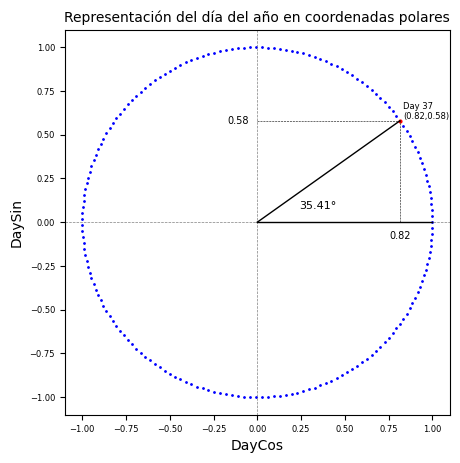

In [ ]:
plot_day_of_year_in_unit_circle()

<p><em>
Codificar la fecha de esta manera cuenta con la ventaja de que indirectamente estamos incorporando la información de las estaciones del año, ya que para valores positivos de <font color='light-blue'>CosDay</font> y <font color='light-blue'>SinDay</font> nos encontramos con días de verano mientras que para valores negativos de ambos lo hacemos con días de invierno. En la diagonal opuesta sucede algo similar con días de primavera y otoño.
</em></p>

In [ ]:
def encode_cyclical_date(df, date_column='Date'):
    """
    Encodes a date column into cyclical features using sine and cosine transformations.

    Parameters:
    df (pandas.DataFrame): The dataframe containing the date column.
    date_column (str): The name of the date column. Default is 'Date'.

    Returns:
    pandas.DataFrame: The dataframe with new 'DayCos' and 'DaySin' columns added,
                      and intermediate columns removed.
    """
    # Make a copy to avoid modifying the original dataframe
    df = df.copy()

    # Ensure the date column is in datetime format
    df[date_column] = pd.to_datetime(df[date_column])

    # Calculate day of year
    df['DayOfYear'] = df[date_column].dt.dayofyear

    # Determine the number of days in the year for each date (taking leap years into account)
    df['DaysInYear'] = df[date_column].dt.is_leap_year.apply(
        lambda leap: 366 if leap else 365)

    # Convert day of the year to angle in radians, dividing by DaysInYear + 1
    df['Angle'] = 2 * np.pi * (df['DayOfYear'] - 1) / df['DaysInYear']

    # Calculate sine and cosine features
    df['DayCos'] = np.cos(df['Angle'])
    df['DaySin'] = np.sin(df['Angle'])

    # Remove intermediate columns
    df = df.drop(columns=["DayOfYear", "DaysInYear", "Angle"])

    return df

In [ ]:
df_date_encoded = encode_cyclical_date(df.copy())
df_date_encoded[date_columns + ['DayCos', 'DaySin']]

,Date,DayCos,DaySin
0,2008-12-01,0.861702,-0.507415
1,2008-12-02,0.870285,-0.492548
2,2008-12-03,0.878612,-0.477536
3,2008-12-04,0.886680,-0.462383
4,2008-12-05,0.894487,-0.447094
...,...,...,...
145454,2017-06-20,-0.976938,0.213521
145455,2017-06-21,-0.980469,0.196673
145456,2017-06-22,-0.983709,0.179767
145457,2017-06-23,-0.986658,0.162807


Vamos a entrenar un modelo de Regresión Logística utilizando únicamente las columnas creadas como features para predecir la variable objetivo <code>RainTomorrow</code>. Vamos a comparar los resultados obtenidos mediante esa codificación con la codificación ordinal del día y el mes para examinar el desempeño de la técnica utilizada.

In [ ]:
# Initialize lists to store results
random_states = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
polar_results = []
integer_results = []

# Methodology 1: DayCos, DaySin
df_model_cos_sin = df_date_encoded[["DayCos", "DaySin", "RainTomorrow"]]
df_model_cos_sin = df_model_cos_sin.dropna(how='any').reset_index(drop=True)

# Methodology 2: Day, Month
df_model_day_month = df_date_encoded[["Date", "RainTomorrow"]]
df_model_day_month["Day"] = df_model_day_month["Date"].dt.day
df_model_day_month["Month"] = df_model_day_month["Date"].dt.month
df_model_day_month = pd.get_dummies(df_model_day_month, columns=["Month"], drop_first=True, dtype=int)
df_model_day_month = df_model_day_month.drop(columns="Date")
df_model_day_month = df_model_day_month.dropna(how='any').reset_index(drop=True)

for random_state in random_states:
    # Methodology 1: DayCos, DaySin
    X1 = df_model_cos_sin.drop(columns="RainTomorrow")
    y1 = df_model_cos_sin["RainTomorrow"]
    X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=random_state)

    scaler = StandardScaler()
    X1_train_scaled = scaler.fit_transform(X1_train)
    X1_test_scaled = scaler.transform(X1_test)

    model1 = LogisticRegression(class_weight='balanced')
    model1.fit(X1_train_scaled, y1_train)
    y1_pred = model1.predict(X1_test_scaled)

    acc1 = accuracy_score(y1_test, y1_pred)
    f1_1 = f1_score(y1_test, y1_pred)

    polar_results.append({
        'RandomState': random_state,
        'PolarAccuracy': round(acc1, 3),
        'PolarF1': round(f1_1, 3)
    })

    # Methodology 2: Day, Month
    X2 = df_model_day_month.drop(columns="RainTomorrow")
    y2 = df_model_day_month["RainTomorrow"]
    X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=random_state)

    scaler = StandardScaler()
    X2_train_scaled = scaler.fit_transform(X2_train)
    X2_test_scaled = scaler.transform(X2_test)

    model2 = LogisticRegression(class_weight='balanced')
    model2.fit(X2_train_scaled, y2_train)
    y2_pred = model2.predict(X2_test_scaled)

    acc2 = accuracy_score(y2_test, y2_pred)
    f1_2 = f1_score(y2_test, y2_pred)

    integer_results.append({
        'RandomState': random_state,
        'IntegerAccuracy': round(acc2, 3),
        'IntegerF1': round(f1_2, 3)
    })

# Create DataFrames from results
polar_df = pd.DataFrame(polar_results)
integer_df = pd.DataFrame(integer_results)

# Merge the DataFrames on 'RandomState'
comparison_df = pd.merge(polar_df, integer_df, on='RandomState')

# Display the comparison DataFrame
comparison_df

,RandomState,PolarAccuracy,PolarF1,IntegerAccuracy,IntegerF1
0,10,0.520,0.329,0.574,0.325
1,20,0.524,0.343,0.599,0.323
2,30,0.521,0.336,0.583,0.321
3,40,0.524,0.335,0.595,0.321
4,50,0.520,0.329,0.575,0.316
5,60,0.521,0.330,0.575,0.315
6,70,0.528,0.345,0.583,0.331
7,80,0.522,0.338,0.582,0.323
8,90,0.519,0.336,0.567,0.321
9,100,0.521,0.329,0.575,0.313


<p><em>
Observamos que los resultados obtenidos con la codificación de las fechas en coordenadas polares tuvo una performance superior para el F1 score para todos los valores de random state seleccionados. Si bien el accuracy de los modelos codificados con el número para el día y one-hot pára los meses es superior, recordamos que debido al desbalanceo entre clases, el accuracy se encuentra inflado para modelos que predicen mayormente que no llueve. Por otro lado, el F1 score refleja un balance entre la precisión y la sensibilidad del modelo.
</em></p>

Finalmente, creamos el paso, lo probamos y lo agregamos al pipeline:

In [ ]:
# Crear el FunctionTransformer
cyclical_date_transformer = FunctionTransformer(
    func=encode_cyclical_date,
    kw_args={'date_column': 'Date'},
    validate=False
)

In [ ]:
# Probamos el paso
df = cyclical_date_transformer.fit_transform(df)
df

,Location,WindGustDir,WindDir9am,WindDir3pm,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Date,RainToday,RainTomorrow,DayCos,DaySin
0,Albury,W,W,WNW,13.4,22.9,0.6,5.469824,7.624853,44.0,...,1007.1,8.000000,4.503167,16.9,21.8,2008-12-01,0.0,0,0.861702,-0.507415
1,Albury,WNW,NNW,WSW,7.4,25.1,0.0,5.469824,7.624853,44.0,...,1007.8,4.437189,4.503167,17.2,24.3,2008-12-02,0.0,0,0.870285,-0.492548
2,Albury,WSW,W,WSW,12.9,25.7,0.0,5.469824,7.624853,46.0,...,1008.7,4.437189,2.000000,21.0,23.2,2008-12-03,0.0,0,0.878612,-0.477536
3,Albury,NE,SE,E,9.2,28.0,0.0,5.469824,7.624853,24.0,...,1012.8,4.437189,4.503167,18.1,26.5,2008-12-04,0.0,0,0.886680,-0.462383
4,Albury,W,ENE,NW,17.5,32.3,1.0,5.469824,7.624853,41.0,...,1006.0,7.000000,8.000000,17.8,29.7,2008-12-05,0.0,0,0.894487,-0.447094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,Uluru,E,ESE,E,3.5,21.8,0.0,5.469824,7.624853,31.0,...,1021.2,4.437189,4.503167,9.4,20.9,2017-06-20,0.0,0,-0.976938,0.213521
145455,Uluru,E,SE,ENE,2.8,23.4,0.0,5.469824,7.624853,31.0,...,1020.3,4.437189,4.503167,10.1,22.4,2017-06-21,0.0,0,-0.980469,0.196673
145456,Uluru,NNW,SE,N,3.6,25.3,0.0,5.469824,7.624853,22.0,...,1019.1,4.437189,4.503167,10.9,24.5,2017-06-22,0.0,0,-0.983709,0.179767
145457,Uluru,N,SE,WNW,5.4,26.9,0.0,5.469824,7.624853,37.0,...,1016.8,4.437189,4.503167,12.5,26.1,2017-06-23,0.0,0,-0.986658,0.162807


In [ ]:
# Agregamos el paso.
data_pipeline.steps.append(('cyclical_date_transformer', cyclical_date_transformer))
data_pipeline

Pipeline(steps=[('feature_transf',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('categories',
                                                  FunctionTransformer(func=<function to_category at 0x0000018E0F756B60>),
                                                  ['Location', 'WindGustDir',
                                                   'WindDir9am',
                                                   'WindDir3pm']),
                                                 ('date',
                                                  FunctionTransformer(func=<function to_datetime at 0x0000018E0F458860>),
                                                  ['Date']),
                                                 ('bool',
                                                  FunctionTransformer(func=<func...
                                                   'Rainfall', 'Evaporation',
                                                   'Sunshine', 'WindGustSpeed',
                                                   'WindSpeed9am',
                                                   'WindSpeed3pm',
                                                   'Humidity9am', 'Humidity3pm',
                                                   'Pressure9am', 'Pressure3pm',
                                                   'Cloud9am', 'Cloud3pm',
                                                   'Temp9am', 'Temp3pm'])],
                                   verbose_feature_names_out=False)),
                ('cyclical_date_transformer',
                 FunctionTransformer(func=<function encode_cyclical_date at 0x0000018E39DDADE0>,
                                     kw_args={'date_column': 'Date'}))])

##### 2.2.3.2. Variable "Location"

Como evaluamos en el apartado anterior, la distancia entre estaciones meteorológicas es inversamente proporcional al coeficiente Phi para la variable <code>RainToday</code>. En decir, si en una estación se registra lluvia, es probable que en una estación cercana también se registre la misma condición.

Vamos a codificar la locación a partir de las coordenadas de __Latitud__ y __Longitud__ obtenidas mediante geolocalización con *Open Street Map* 🌍. De este modo informamos al modelo con la relación espacial entre las estaciones. Además, evitamos la representación dispersa que implicara utilizar one hot encoding con una variable de alta cardinalidad.

In [ ]:
df2 = pd.merge(df, gdf_locations.drop(columns="geometry"), on="Location")

In [ ]:
def encode_location(df: pd.DataFrame, gdf_locations) -> pd.DataFrame:
    return pd.merge(df, gdf_locations.drop(columns="geometry"), on="Location")

In [ ]:
encode_location_transformer = FunctionTransformer(
    func=encode_location,
    kw_args={'gdf_locations': gdf_locations},
    validate=False
)

In [ ]:
# Probamos el paso
df = encode_location_transformer.fit_transform(df)
df

,Location,WindGustDir,WindDir9am,WindDir3pm,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,...,Cloud3pm,Temp9am,Temp3pm,Date,RainToday,RainTomorrow,DayCos,DaySin,Lat,Lon
0,Albury,W,W,WNW,13.4,22.9,0.6,5.469824,7.624853,44.0,...,4.503167,16.9,21.8,2008-12-01,0.0,0,0.861702,-0.507415,-36.080477,146.916280
1,Albury,WNW,NNW,WSW,7.4,25.1,0.0,5.469824,7.624853,44.0,...,4.503167,17.2,24.3,2008-12-02,0.0,0,0.870285,-0.492548,-36.080477,146.916280
2,Albury,WSW,W,WSW,12.9,25.7,0.0,5.469824,7.624853,46.0,...,2.000000,21.0,23.2,2008-12-03,0.0,0,0.878612,-0.477536,-36.080477,146.916280
3,Albury,NE,SE,E,9.2,28.0,0.0,5.469824,7.624853,24.0,...,4.503167,18.1,26.5,2008-12-04,0.0,0,0.886680,-0.462383,-36.080477,146.916280
4,Albury,W,ENE,NW,17.5,32.3,1.0,5.469824,7.624853,41.0,...,8.000000,17.8,29.7,2008-12-05,0.0,0,0.894487,-0.447094,-36.080477,146.916280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136294,Uluru,E,ESE,E,3.5,21.8,0.0,5.469824,7.624853,31.0,...,4.503167,9.4,20.9,2017-06-20,0.0,0,-0.976938,0.213521,-25.345554,131.036961
136295,Uluru,E,SE,ENE,2.8,23.4,0.0,5.469824,7.624853,31.0,...,4.503167,10.1,22.4,2017-06-21,0.0,0,-0.980469,0.196673,-25.345554,131.036961
136296,Uluru,NNW,SE,N,3.6,25.3,0.0,5.469824,7.624853,22.0,...,4.503167,10.9,24.5,2017-06-22,0.0,0,-0.983709,0.179767,-25.345554,131.036961
136297,Uluru,N,SE,WNW,5.4,26.9,0.0,5.469824,7.624853,37.0,...,4.503167,12.5,26.1,2017-06-23,0.0,0,-0.986658,0.162807,-25.345554,131.036961


In [ ]:
# Agregamos el paso al pipeline
data_pipeline.steps.append(('encode_location_transformer', encode_location_transformer))
data_pipeline

Pipeline(steps=[('feature_transf',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('categories',
                                                  FunctionTransformer(func=<function to_category at 0x0000018E0F756B60>),
                                                  ['Location', 'WindGustDir',
                                                   'WindDir9am',
                                                   'WindDir3pm']),
                                                 ('date',
                                                  FunctionTransformer(func=<function to_datetime at 0x0000018E0F458860>),
                                                  ['Date']),
                                                 ('bool',
                                                  FunctionTransformer(func=<func...
42           Walpole -34.977680  116.731006  POINT (116.73101 -34.97768)
43            Hobart -42.882509  147.328123  POINT (147.32812 -42.88251)
44        Launceston -41.434081  147.137350  POINT (147.13735 -41.43408)
45      AliceSprings -23.698388  133.881289  POINT (133.88129 -23.69839)
46            Darwin -12.460440  130.841047  POINT (130.84105 -12.46044)
47         Katherine -14.464616  132.263599  POINT (132.26360 -14.46462)
48             Uluru -25.345554  131.036961  POINT (131.03696 -25.34555)}))])

##### 2.2.3.3. Variables "WindDir"

Al igual que sucede con la variable de fecha, las variables relacionadas con la dirección del viento también poseen un orden circular. En el caso de estas últimas variables, incluso, necesitamos un menor grado de abstracción ya que la dirección del viento puede representarse intuitivamente como la dirección de un vector en dos dimensiones $(x, y)$. El eje $x$ representa la dirección __Este-Oeste__ y el eje $y$ representa la dirección __Norte-Sur__.

In [ ]:
def encode_wind_dir(df):
    dirs = ["E", "ENE", "NE", "NNE", "N", "NNW", "NW", "WNW", "W", "WSW", "SW", "SSW", "S", "SSE", "SE", "ESE"]
    angles = np.radians(np.arange(0, 360, 22.5))
    mapping_dict = {d: a for (d, a) in zip(dirs, angles)}

    wind_dir_columns = ["WindGustDir", "WindDir9am", "WindDir3pm"]
    for column in wind_dir_columns:
        df[f"{column}Angle"] = df[column].map(mapping_dict)

        df[f"{column}Cos"] = np.cos(df[f"{column}Angle"].astype(float))
        df[f"{column}Sin"] = np.sin(df[f"{column}Angle"].astype(float))

        df = df.drop(columns=f"{column}Angle")
    
    return df

In [ ]:
encode_wind_dir_transformer = FunctionTransformer(encode_wind_dir,
                                                  validate=False)

In [ ]:
# Probamos el paso
df = encode_wind_dir_transformer.fit_transform(df)
df

,Location,WindGustDir,WindDir9am,WindDir3pm,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,...,DayCos,DaySin,Lat,Lon,WindGustDirCos,WindGustDirSin,WindDir9amCos,WindDir9amSin,WindDir3pmCos,WindDir3pmSin
0,Albury,W,W,WNW,13.4,22.9,0.6,5.469824,7.624853,44.0,...,0.861702,-0.507415,-36.080477,146.916280,-1.000000e+00,1.224647e-16,-1.000000,1.224647e-16,-9.238795e-01,0.382683
1,Albury,WNW,NNW,WSW,7.4,25.1,0.0,5.469824,7.624853,44.0,...,0.870285,-0.492548,-36.080477,146.916280,-9.238795e-01,3.826834e-01,-0.382683,9.238795e-01,-9.238795e-01,-0.382683
2,Albury,WSW,W,WSW,12.9,25.7,0.0,5.469824,7.624853,46.0,...,0.878612,-0.477536,-36.080477,146.916280,-9.238795e-01,-3.826834e-01,-1.000000,1.224647e-16,-9.238795e-01,-0.382683
3,Albury,NE,SE,E,9.2,28.0,0.0,5.469824,7.624853,24.0,...,0.886680,-0.462383,-36.080477,146.916280,7.071068e-01,7.071068e-01,0.707107,-7.071068e-01,1.000000e+00,0.000000
4,Albury,W,ENE,NW,17.5,32.3,1.0,5.469824,7.624853,41.0,...,0.894487,-0.447094,-36.080477,146.916280,-1.000000e+00,1.224647e-16,0.923880,3.826834e-01,-7.071068e-01,0.707107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136294,Uluru,E,ESE,E,3.5,21.8,0.0,5.469824,7.624853,31.0,...,-0.976938,0.213521,-25.345554,131.036961,1.000000e+00,0.000000e+00,0.923880,-3.826834e-01,1.000000e+00,0.000000
136295,Uluru,E,SE,ENE,2.8,23.4,0.0,5.469824,7.624853,31.0,...,-0.980469,0.196673,-25.345554,131.036961,1.000000e+00,0.000000e+00,0.707107,-7.071068e-01,9.238795e-01,0.382683
136296,Uluru,NNW,SE,N,3.6,25.3,0.0,5.469824,7.624853,22.0,...,-0.983709,0.179767,-25.345554,131.036961,-3.826834e-01,9.238795e-01,0.707107,-7.071068e-01,6.123234e-17,1.000000
136297,Uluru,N,SE,WNW,5.4,26.9,0.0,5.469824,7.624853,37.0,...,-0.986658,0.162807,-25.345554,131.036961,6.123234e-17,1.000000e+00,0.707107,-7.071068e-01,-9.238795e-01,0.382683


In [ ]:
# Agregamos el paso al pipeline
data_pipeline.steps.append(('encode_wind_dir_transformer', encode_wind_dir_transformer))
data_pipeline

Pipeline(steps=[('feature_transf',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('categories',
                                                  FunctionTransformer(func=<function to_category at 0x0000018E0F756B60>),
                                                  ['Location', 'WindGustDir',
                                                   'WindDir9am',
                                                   'WindDir3pm']),
                                                 ('date',
                                                  FunctionTransformer(func=<function to_datetime at 0x0000018E0F458860>),
                                                  ['Date']),
                                                 ('bool',
                                                  FunctionTransformer(func=<func...
44        Launceston -41.434081  147.137350  POINT (147.13735 -41.43408)
45      AliceSprings -23.698388  133.881289  POINT (133.88129 -23.69839)
46            Darwin -12.460440  130.841047  POINT (130.84105 -12.46044)
47         Katherine -14.464616  132.263599  POINT (132.26360 -14.46462)
48             Uluru -25.345554  131.036961  POINT (131.03696 -25.34555)})),
                ('encode_wind_dir_transformer',
                 FunctionTransformer(func=<function encode_wind_dir at 0x0000018E3B783560>))])

Vamos a entrenar un modelo de *Regresión Logística* utilizando las columnas creadas como features para predecir la variable objetivo <code>RainTomorrow</code>, incluyendo las variables de velocidad del viento, ubicación de la estación meteorológica y la presencia o ausencia de lluvia para el día registrado. La incorporación de estás últimas variables se debe a que no se espera que los datos de la dirección del viento por si solo resulte informativa para predecir la lluvia del día siguiente. Vamos a comparar los resultados obtenidos mediante esa codificación con la codificación mediante one-hot encoding de la dirección del viento para examinar el desempeño de la técnica utilizada.

In [ ]:
# Initialize lists to store results
random_states = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
polar_results = []
integer_results = []

# Methodology 1: DayCos, DaySin
df_model_cos_sin = df[
    [
        "Lat",
        "Lon",
        "WindGustSpeed",
        "WindSpeed9am",
        "WindSpeed3pm",
        "WindGustDirCos",
        "WindGustDirSin",
        "WindDir9amCos",
        "WindDir9amSin",
        "WindDir3pmCos",
        "WindDir3pmSin",
        "RainToday",
        "RainTomorrow",
    ]
]
df_model_cos_sin = df_model_cos_sin.dropna(how="any").reset_index(drop=True)

# Methodology 2: Day, Month
df_model_one_hot = df[
    [
        "Lat",
        "Lon",
        "WindGustSpeed",
        "WindSpeed9am",
        "WindSpeed3pm",
        "WindGustDir",
        "WindDir9am",
        "WindDir3pm",
        "RainToday",
        "RainTomorrow",
    ]
]
df_model_one_hot = df_model_one_hot.dropna(how="any").reset_index(drop=True)

df_model_one_hot = pd.get_dummies(
    df_model_one_hot,
    columns=["WindGustDir", "WindDir9am", "WindDir3pm"],
    drop_first=True,
    dtype=int,
)

for random_state in random_states:
    # Methodology 1: DayCos, DaySin
    X1 = df_model_cos_sin.drop(columns="RainTomorrow")
    y1 = df_model_cos_sin["RainTomorrow"]
    X1_train, X1_test, y1_train, y1_test = train_test_split(
        X1, y1, test_size=0.2, random_state=random_state
    )

    scaler = StandardScaler()
    X1_train_scaled = scaler.fit_transform(X1_train)
    X1_test_scaled = scaler.transform(X1_test)

    model1 = LogisticRegression(class_weight="balanced")
    model1.fit(X1_train_scaled, y1_train)
    y1_pred = model1.predict(X1_test_scaled)

    acc1 = accuracy_score(y1_test, y1_pred)
    f1_1 = f1_score(y1_test, y1_pred)

    polar_results.append(
        {
            "RandomState": random_state,
            "PolarAccuracy": round(acc1, 3),
            "PolarF1": round(f1_1, 3),
        }
    )

    # Methodology 2: Day, Month
    X2 = df_model_one_hot.drop(columns="RainTomorrow")
    y2 = df_model_one_hot["RainTomorrow"]
    X2_train, X2_test, y2_train, y2_test = train_test_split(
        X2, y2, test_size=0.2, random_state=random_state
    )

    scaler = StandardScaler()
    X2_train_scaled = scaler.fit_transform(X2_train)
    X2_test_scaled = scaler.transform(X2_test)

    model2 = LogisticRegression(class_weight="balanced")
    model2.fit(X2_train_scaled, y2_train)
    y2_pred = model2.predict(X2_test_scaled)

    acc2 = accuracy_score(y2_test, y2_pred)
    f1_2 = f1_score(y2_test, y2_pred)

    integer_results.append(
        {
            "RandomState": random_state,
            "IntegerAccuracy": round(acc2, 3),
            "IntegerF1": round(f1_2, 3),
        }
    )

# Create DataFrames from results
polar_df = pd.DataFrame(polar_results)
integer_df = pd.DataFrame(integer_results)

# Merge the DataFrames on 'RandomState'
comparison_df = pd.merge(polar_df, integer_df, on="RandomState")

# Display the comparison DataFrame
comparison_df

,RandomState,PolarAccuracy,PolarF1,IntegerAccuracy,IntegerF1
0,10,0.725,0.502,0.723,0.503
1,20,0.725,0.498,0.722,0.498
2,30,0.728,0.502,0.727,0.507
3,40,0.723,0.502,0.720,0.503
4,50,0.729,0.504,0.725,0.504
5,60,0.726,0.504,0.724,0.505
6,70,0.726,0.500,0.724,0.502
7,80,0.726,0.504,0.724,0.504
8,90,0.730,0.504,0.728,0.504
9,100,0.728,0.505,0.725,0.506


<p><em>
La comparación realizada no arroja evidencia contundente de la superioridad de alguno de los métodos sobre el otro para la tarea que estamos realizando.

Tanto la codificación de coordenadas polares como la codificación one-hot ofrecen distintas ventajas y potenciales riesgos como representación de la dirección del viento.

La codificación de coordenadas polares, con su representación compacta de solo dos características (<font color='light-blue'>CosAngle</font> y <font color='light-blue'>SinAngle</font>), es computacionalmente eficiente y captura la naturaleza circular de la dirección del viento, lo que la hace adecuada para modelos que manejan datos continuos de manera efectiva. Además puede constribuir a la interpretabilidad si se entiende la relación entre los valores que asumen estas variables y los puntos cardinales. Se intuye que este tipo de codificación puede resultar beneficiosa para modelos como *SVM* que son computacionalmente muy costosos en altas dimensiones, y modelos como *KNN* que se ven favorecidos por una codificación que respeta la distancia espacial entre categorías. Por otro lado, los árboles de decisión trabajan sobre separaciones ortogonales, esto puede complejizar la tarea de aislar los observaciones correspondientes a una sóla de las categorías posibles. Sin embargo, no se descarta que resulte beneficioso la posibilidad de separar direcciones del viento similares entre si de forma eficiente.

En cambio, la codificación one-hot garantiza la independencia de las variables creadas, lo que es especialmente beneficioso para modelos lineales como la *regresión logística*. Aumentando el espacio de características en 15 características binarias por cada una de las variables originales, preserva la granularidad de los datos categóricos sin asumir ningún orden inherente. Las nuevas variables creadas generan un dataset de entrenamiento altamente disperso lo que puede resultar problemático para modelos de redes neuronales. La representación categórica de los datos, incluso sin la necesidad de realizar one hot encoding, puede resultar beneficioso para modelos generados a partir de ensambles de árboles.

Dadas las ligeras diferencias en las puntuaciones F1 observadas en nuestros experimentos y las diferentes fortalezas de cada método, no encontramos evidencia definitiva para elegir uno sobre el otro. Por lo tanto, continuaremos probando nuestros modelos utilizando ambas representaciones, seleccionando el método más apropiado en función de casos de uso específicos.
</em></p>

#### 2.2.4. Evaluar importancia de las variables

Vamos a realizar un análisis de componentes principales para realizar una inspección visual e intuir la potencialidad de las variables elegidas para separar entre clases de la variable objetivo.

In [ ]:
features_list = ["DayCos", "DaySin", "Lat", "Lon", "MinTemp", "MaxTemp", "Rainfall", "Evaporation", "Sunshine", "WindGustDirCos",
                 "WindGustDirSin", "WindGustSpeed", "WindDir9amCos", "WindDir9amSin", "WindSpeed9am", "WindDir3pmCos", "WindDir3pmSin",
                 "WindSpeed3pm", "Humidity9am", "Humidity3pm", "Pressure9am", "Pressure3pm", "Cloud9am", "Cloud3pm", "Temp9am",
                 "Temp3pm", "RainToday" ]

n_max_feat = len(max(features_list, key=len))

df_model = df[features_list + ["RainTomorrow"]]
df_model = df_model.dropna(how='any').reset_index(drop=True)

X = df_model[features_list]
y = df_model["RainTomorrow"]

# Plot training data in two dimensions to visualize if captured features relate to labels.
scaler_manual = StandardScaler()
X_scaled = scaler_manual.fit_transform(X)

# Apply PCA for dimensionality reduction
pca = PCA(random_state=random_state)
X_pca = pca.fit_transform(X_scaled)

In [ ]:
# Plot subsample
random.seed(random_state)
subsample_size = 5000
subsample_indices = random.sample(range(len(y)), subsample_size)

X_subsample = X_pca[subsample_indices]
y_subsample = y[subsample_indices]

plt.figure(figsize=(5, 5))

plt.scatter(
    X_subsample[y_subsample == 0, 0],
    X_subsample[y_subsample == 0, 1],
    c=spectral_palette[9],
    label="Negativo para RainTomorrow",
    s=5,
    alpha=0.4,
)

plt.scatter(
    X_subsample[y_subsample == 1, 0],
    X_subsample[y_subsample == 1, 1],
    c=spectral_palette[1],
    label="Positivo para RainTomorrow",
    s=5,
    alpha=0.4
)

x_min, x_max = -10, 10
y_min, y_max = -10, 10

plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.title('PCA de las features para nuestros modelos', fontsize=10)

# Set alpha=1 for the legend only
legend = plt.legend(prop={'size': 8})
for lh in legend.legend_handles:
    lh.set_alpha(1)

plt.show()

KeyError: "None of [Index([ 38186, 120462, 119256,  45809, 103031,  91681, 113643, 132871,  28827,\n        31801,\n       ...\n        12674,  87223,   3221, 109015,  22405,  85816,  39248,  90176,  52049,\n        21423],\n      dtype='int32', length=5000)] are in the [columns]"

<p><em>
Podemos observar que las dos componentes principales no son suficientes para esbozar una separación entre las clases de la variable objetivo. Sin embargo, podemos ver que efectivamente ambas clases se agrupan en respectivos clusters aunque estos se encuentren solapados. El reconocimiento de estos clusters sugiere que las variables elegidas poseen cierta habilidad para distinguir entre clases.
</em></p>

Vamos a analizar ahora la composición del componente principal 1 obtenido.

In [ ]:
# Get the loadings for the first principal component
loadings = pca.components_[0]
pc1_loadings = pd.DataFrame(loadings, index=X.columns, columns=['PC1 Loading'])

# Get the explained variance ratio to understand how much variance each component explains
explained_variance = pca.explained_variance_ratio_

# Print loadings for the first principal component
print("Explained Variance by PC1:", explained_variance[0], "\n")
print(pc1_loadings.sort_values(by='PC1 Loading', ascending=False).head(10))

Explained Variance by PC1: 0.22064847155830106 

                PC1 Loading
MaxTemp            0.380529
Temp3pm            0.374984
Temp9am            0.366405
MinTemp            0.308404
DayCos             0.260835
Evaporation        0.231262
Lat                0.205918
Sunshine           0.178621
WindDir9amCos      0.136525
WindGustDirCos     0.117520


<p><em>
Analizar la composición de los componentes principales puede resultar útil para entender el aporte de cada una de las variables de entrada a la varianza del dataset. Sin embargo, en este caso, el componente principal 1 explica sólo el 24% de la varianza total por lo que el análisis resulta insuficiente para entender el aporte de las features a la estructura del dataset.
</em></p>

Para realizar una evaluación más precisa de la importancia de las variables del dataset en la tarea de predecir lluvia para el día siguiente, entrenamos un modelo de random forest y extraemos del mismo la contribución de cada una de las variables a la reducción de la impureza *Gini*. Para el entrenamiento del modelo no se dividirán los datos en entrenamiento y testeo, ya que no nos interesa utilizarlo para realizar inferencias.

In [ ]:
# Check importance of each feature.
rf_importance = RandomForestClassifier(random_state=42)
rf_importance.fit(X, y)

feature_importances = rf_importance.feature_importances_
rf_feature_importances = pd.DataFrame(feature_importances, index=X.columns, columns=['Feature Importance'])

print(rf_feature_importances.sort_values(by='Feature Importance', ascending=False))

<p><em>
Todas las variables oscilan en un rango de importancia comprendida entre 0.16 y 0.015, teniendo la mayoría de ellas valores cercanos al umbral mínimo mencionado.

El análisis nos permite distinguir dos cuestiones de importancia:
- En primer lugar que no encontramos variables con una importancia ínfima que sugiera su descarte, es decir, en mayor o menor medida todas las features resultan informativas para la tarea que llevamos a cabo.
- En segundo lugar, la medida de Humidity3pm y de Sunshine se destacan por su importancia relevada respecto al resto de las variables. Esta situación verifica nuestra hipótesis de la importancia de ambas variables cuando analizamos el pairplot entre todas las variables numéricas.
</em></p>

#### 2.2.5. Eliminar columnas

Finalmente agregamos un paso en donde se eliminan las columnas que fueron codificadas:

In [ ]:
def eliminar_columnas(df, columnas_a_eliminar):
    return df.drop(columns=columnas_a_eliminar)

In [ ]:
columnas_codificadas = ["WindGustDir",
                        "WindDir9am", "WindDir3pm", "Date", "Location"]
eliminar_columnas_transformer = FunctionTransformer(
    eliminar_columnas, kw_args={'columnas_a_eliminar': columnas_codificadas})

# Probamos el paso
df = eliminar_columnas_transformer.fit_transform(df)
df

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,DayCos,DaySin,Lat,Lon,WindGustDirCos,WindGustDirSin,WindDir9amCos,WindDir9amSin,WindDir3pmCos,WindDir3pmSin
0,13.4,22.9,0.6,5.469824,7.624853,44.0,20.0,24.0,71.0,22.0,...,0.861702,-0.507415,-36.080477,146.916280,-1.000000e+00,1.224647e-16,-1.000000,1.224647e-16,-9.238795e-01,0.382683
1,7.4,25.1,0.0,5.469824,7.624853,44.0,4.0,22.0,44.0,25.0,...,0.870285,-0.492548,-36.080477,146.916280,-9.238795e-01,3.826834e-01,-0.382683,9.238795e-01,-9.238795e-01,-0.382683
2,12.9,25.7,0.0,5.469824,7.624853,46.0,19.0,26.0,38.0,30.0,...,0.878612,-0.477536,-36.080477,146.916280,-9.238795e-01,-3.826834e-01,-1.000000,1.224647e-16,-9.238795e-01,-0.382683
3,9.2,28.0,0.0,5.469824,7.624853,24.0,11.0,9.0,45.0,16.0,...,0.886680,-0.462383,-36.080477,146.916280,7.071068e-01,7.071068e-01,0.707107,-7.071068e-01,1.000000e+00,0.000000
4,17.5,32.3,1.0,5.469824,7.624853,41.0,7.0,20.0,82.0,33.0,...,0.894487,-0.447094,-36.080477,146.916280,-1.000000e+00,1.224647e-16,0.923880,3.826834e-01,-7.071068e-01,0.707107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136294,3.5,21.8,0.0,5.469824,7.624853,31.0,15.0,13.0,59.0,27.0,...,-0.976938,0.213521,-25.345554,131.036961,1.000000e+00,0.000000e+00,0.923880,-3.826834e-01,1.000000e+00,0.000000
136295,2.8,23.4,0.0,5.469824,7.624853,31.0,13.0,11.0,51.0,24.0,...,-0.980469,0.196673,-25.345554,131.036961,1.000000e+00,0.000000e+00,0.707107,-7.071068e-01,9.238795e-01,0.382683
136296,3.6,25.3,0.0,5.469824,7.624853,22.0,13.0,9.0,56.0,21.0,...,-0.983709,0.179767,-25.345554,131.036961,-3.826834e-01,9.238795e-01,0.707107,-7.071068e-01,6.123234e-17,1.000000
136297,5.4,26.9,0.0,5.469824,7.624853,37.0,9.0,9.0,53.0,24.0,...,-0.986658,0.162807,-25.345554,131.036961,6.123234e-17,1.000000e+00,0.707107,-7.071068e-01,-9.238795e-01,0.382683


In [ ]:
# Agregamos el paso al pipeline
data_pipeline.steps.append(('eliminar_columnas_transformer', eliminar_columnas_transformer))
data_pipeline

Pipeline(steps=[('feature_transf',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('categories',
                                                  FunctionTransformer(func=<function to_category at 0x0000018E0F756B60>),
                                                  ['Location', 'WindGustDir',
                                                   'WindDir9am',
                                                   'WindDir3pm']),
                                                 ('date',
                                                  FunctionTransformer(func=<function to_datetime at 0x0000018E0F458860>),
                                                  ['Date']),
                                                 ('bool',
                                                  FunctionTransformer(func=<func...
48             Uluru -25.345554  131.036961  POINT (131.03696 -25.34555)})),
                ('encode_wind_dir_transformer',
                 FunctionTransformer(func=<function encode_wind_dir at 0x0000018E3B783560>)),
                ('eliminar_columnas_transformer',
                 FunctionTransformer(func=<function eliminar_columnas at 0x0000018E3B7549A0>,
                                     kw_args={'columnas_a_eliminar': ['WindGustDir',
                                                                      'WindDir9am',
                                                                      'WindDir3pm',
                                                                      'Date',
                                                                      'Location']}))])

#### 2.2.6. Exportación de datos y pipeline

In [ ]:
# Mostramos como quedó el conjunto pre-procesado
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,DayCos,DaySin,Lat,Lon,WindGustDirCos,WindGustDirSin,WindDir9amCos,WindDir9amSin,WindDir3pmCos,WindDir3pmSin
0,13.4,22.9,0.6,5.469824,7.624853,44.0,20.0,24.0,71.0,22.0,...,0.861702,-0.507415,-36.080477,146.91628,-1.000000,1.224647e-16,-1.000000,1.224647e-16,-0.923880,0.382683
1,7.4,25.1,0.0,5.469824,7.624853,44.0,4.0,22.0,44.0,25.0,...,0.870285,-0.492548,-36.080477,146.91628,-0.923880,3.826834e-01,-0.382683,9.238795e-01,-0.923880,-0.382683
2,12.9,25.7,0.0,5.469824,7.624853,46.0,19.0,26.0,38.0,30.0,...,0.878612,-0.477536,-36.080477,146.91628,-0.923880,-3.826834e-01,-1.000000,1.224647e-16,-0.923880,-0.382683
3,9.2,28.0,0.0,5.469824,7.624853,24.0,11.0,9.0,45.0,16.0,...,0.886680,-0.462383,-36.080477,146.91628,0.707107,7.071068e-01,0.707107,-7.071068e-01,1.000000,0.000000
4,17.5,32.3,1.0,5.469824,7.624853,41.0,7.0,20.0,82.0,33.0,...,0.894487,-0.447094,-36.080477,146.91628,-1.000000,1.224647e-16,0.923880,3.826834e-01,-0.707107,0.707107


In [72]:
# Exportamos el dataset
df.to_csv("./data/weather_processed.csv", index=False)
df_pre_processed.to_csv('./data/weather_pre_processed.csv', index=False)

In [68]:
# Exportar el pipeline a un archivo
with open('./data/data_pipeline.pkl', 'wb') as file:
    pickle.dump(data_pipeline, file)
with open('./data/target_pipeline.pkl', 'wb') as file:
    pickle.dump(target_pipeline, file)

### 2.3. Ingeniería de modelos de aprendizaje automático (ML Model Engineering)

In [73]:
# Importamos el conjunto pre-procesado
file_name = './data/weather_pre_processed.csv'
try:
    df = pd.read_csv(file_name)
    print('Dataset pre-procesado local')
except:
  raise Exception('Error al encontrar el archivo')

Dataset pre-procesado local


In [74]:
# Importamos los pipelines
with open('./data/data_pipeline.pkl', 'rb') as file:
    data_pipeline = pickle.load(file)
    
with open('./data/target_pipeline.pkl', 'rb') as file:
    target_pipeline = pickle.load(file)

En esta etapa se prueban los modelos que son adecuados para este tipo de problemas (clasificación). Entre ellos se encuentran:

- Regresión Logística
- Naive-bayes
- K-NN
- Máquinas de Vectores de Soporte (SVM)
- Árboles de Decisión
- Bosques Aleatorios (Random Forests)
- Naive Bayes
- Redes Neuronales (Perceptrón Multicapa, etc.)
- Gradient Boosting (GBM, XGBoost, LightGBM, CatBoost)
- Discriminante Lineal y Cuadrático

Además, existen variantes y combinaciones de estos modelos como:
- Redes Neuronales Recurrentes para datos secuenciales
- Ensambles de modelos (Stacking, Bagging, Boosting)

Así como ajustar los hiperparámetros y técnicas de regularización.

#### 2.3.1. Modelado

In [81]:
# Separamos la variable objetivo del resto de las variables
X = df.drop(columns="RainTomorrow")
y = df["RainTomorrow"]

In [82]:
# Separamos en entrenamiento y testing.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

In [83]:
# Ejecutamos los pipelies de datos
X_train = data_pipeline.fit_transform(X_train)
X_test = data_pipeline.transform(X_test)
y_train = target_pipeline.fit_transform(y_train)
y_test = target_pipeline.transform(y_test)

c:\Users\User\Documents\GitHub\uba-ceia\.venv\Lib\site-packages\sklearn\preprocessing\_function_transformer.py:318: UserWarning: When `set_output` is configured to be 'pandas', `func` should return a pandas DataFrame to follow the `set_output` API  or `feature_names_out` should be defined.
  warnings.warn(warn_msg.format("pandas"))


<font color='red'>TODO: </font>
<font color='red'>Unificar todas las evaluaciones de entrenamiento en DF e ir mostrando coherentemente cada una de estas evaluaciones en cada modelo, y luego al final mostrar todas juntas.</font>

<font color='red'>TODO: </font>
<font color='red'>Curvas ROC</font>

In [ ]:
df_algoritms = pd.DataFrame(columns=["Algorithm", "Sensibility", "Specificity", "Accuracy", "Balanced-Accuracy", "Precision", "Recall", "F1 Score"])

##### 2.3.1.1 Estudio de la literatura y modelo base

A modo de baseline inicial para nuestro trabajo realizamos un modelo simple que predice lluvia para el día siguiente si el día de la observación también llovió, y evaluamos los resultados obtenidos.

In [ ]:
# Construir un modelo que se fije en la columna "RainToday", si es verdadero (o sea, llovió hoy) predice que también lloverá mañana.
y_pred = X_test["RainToday"]

In [ ]:
row = evaluate_predictions(y_test, y_pred, algorithm="Baseline")
df_algoritms.loc[len(df_algoritms)] = row

In [ ]:
pd.DataFrame([row])

In [ ]:
conf_matrix = pd.crosstab(df["RainToday"], df["RainTomorrow"])
phi, p = phi_coefficient(conf_matrix)

print(f"Phi Coefficient: {phi}")
print(f"p-value: {p}")

<p><em>
Observamos que el valor de accuracy se encuentra inflado por el desbalanceo en el dataset. De hecho, si predijeramos siempre ausencia de lluvia obtendríamos un valor de 0.78 en esa métrica. Claro que en ese caso obtendríamos un valor de 0 para precision y recall.

Con este modelo inicial planteado obtenemos un F1 score de 0.47, con valores para precision y recall muy similares.

Calculando el coeficiente Phi entre ambas variables binarias encontramos un valor de 0.3 (asociación entre variables moderada y positiva) con una significancia que nos permite rechazar la hipóteses de que la asociación encontrada puede deberse simplemente a la variabilidad de el muestreo aleatorio.</em></p>

##### 2.3.1.X. Métricas de calidad

Entre las métricas de calidad a utilizar, se encuentran:
- Sensibilidad (**TPR**) ⇒ $ TPR = \frac{TP}{P} = \frac{TP}{TP + FN} = 1 - FNR $
- Especificidad (**TNR**) ⇒ $ TNR = \frac{TN}{N} = \frac{TN}{TN + FP} = 1 - FPR $
- Exactitud (**ACC**) ⇒ $ ACC = \frac{TP + TN}{P + N} $
- Exactitud balanceada (**BA**) ⇒ $ BA = \frac{TPR + TNR}{2} $
- Precisión ⇒ $ Precision = \frac{TP}{TP + FP} $
- Recuperación ⇒ $ Recall = \frac{TP}{TP + FN} $
- F1-score o Fβ-score ⇒ $ F_β = (1 + β^2) * \frac{precision ⋅ recall}{(β^2 ⋅ presicion) + recall}$


<font color='red'>TODO: </font>
<font color='red'>Analizar otras métricas también, como:
- Robustness
- Explainability
- Scalability
- Resource demand
- Model compexity</font>



##### 2.3.1.X. Selección de modelos

Dentro de los modelos de aprendizaje automático, se eligen los siguientes modelos para este caso de estudio:

⟶ [Regresión logística](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

⟶ [Naive-bayes](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB)

##### 2.3.1.X. Entrenamiento de modelos

###### Regresión logística

<strong>Asunciones de la regresión logística:</strong>
- Variable de salida binaria (o multinominal)
- Independencia en variables de entrada
- Baja multicolinearidad entre variables de entrada
- Grandes tamapos de muestra
- Investigar: Normalidad de los datos?

<strong>Entrenamiento:</strong>

In [ ]:
# Importar librerías para estandarizar los datos
from sklearn.preprocessing import StandardScaler

# Estadarizar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Le agrego las columnas
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

In [ ]:
X_train_scaled.describe()

In [ ]:
# Entrenamos el modelo
model = LogisticRegression(class_weight="balanced", random_state=random_state)
model.fit(X_train_scaled, y_train)

In [ ]:
# Realizamos la matriz de confusión
y_pred = model.predict(X_test_scaled)
row = evaluate_predictions(y_test, y_pred, algorithm="Logistic Regression")
df_algoritms.loc[len(df_algoritms)] = row

In [ ]:
pd.DataFrame([row])

###### Naive-bayes

<strong>Asunciones de naive bayes:</strong>
<font color="red">TODO:</font>
<font color="red">Poner asunciones de Naive-bayes (multinominal)</font>

<strong>Entrenamiento:</strong>

In [ ]:
# Estadarizar los datos
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Le agrego las columnas
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

In [ ]:
X_train_scaled.describe()

In [ ]:
# Entrenamos el modelo
model = MultinomialNB()
model.fit(X_train_scaled, y_train)

In [ ]:
# Realizamos la matriz de confusión
y_pred = model.predict(X_test_scaled)
row = evaluate_predictions(y_test, y_pred, algorithm="Naive Bayes")
df_algoritms.loc[len(df_algoritms)] = row

In [ ]:
pd.DataFrame([row])

###### K-NN

###### ANN

### 2.4 Evaluación de modelos de aprendizaje automático (ML Model Evaluation)

> Debería tener en cuenta los siguientes puntos:
> - Validate performance (test set)
>     - Apply data transformation production pipelines
> - Determine robustness
>     - Noisy data testing
>     - Wrong data testing
>     - Statistically estimate model's local and globarl robustness
>     - Should match model's quality attributes
> - Increase explainability for ML practitioner and end user
>     - Enriching the data set
> - Compare results with defined success criteria
>     - Iterations if success criteria are not met
>     - Make a decision whether to deploy de model
>     - Document the evaluation phase
> - Recomendations
>     - Offline testing
>     - Confussion matrix
>     - Show explainability reports

### 2.5 Despliegue del modelo (Model Deployment)

🔮 Futuras versiones 🔮

### 2.6 Monitoreo y mantenimiento del modelo (Model Monitoring and Maintenance)

🔮 Futuras versiones 🔮

## 3. Mejora continua

> Mejoras planteadas en un futuro:
> - Fases que faltaron implementar o mejorar
> - Mejorar los procesos
> - Mejorar la documentación de los procesos
> - Mejorar las referencias
> - Mejorar el archivo de código auxiliar (principalmente las improtaciones)
> - Refactorizar el código actual en código auxiliar
> - Tratamiento de valores a-típicos
> - Mejorar documentos de salida. Refactorizar y especificar los documentos de salidas.

## 4. Referencias

- https://en.wikipedia.org/wiki/List_of_extreme_temperatures_in_Australia
- https://ml-ops.org/content/crisp-ml
- https://www.researchgate.net/publication/369194767_A_Different_Traditional_Approach_for_Automatic_Comparative_Machine_Learning_in_Multimodality_Covid-19_Severity_Recognition
- https://arxiv.org/pdf/2003.05155.pdf

## 5. Apendices

In [ ]:
with open("utils.py") as f:
  print(f.read())